In [1]:
## Hiding code for simplicity

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

Source: https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer

## Importing Libraries

In [146]:
import pandas as pd
import json
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import scipy.stats as ss
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, precision_score, classification_report
from sklearn.utils import resample

In [147]:
pd.set_option('display.max_columns', None)

In [148]:
pd.set_option('display.max_rows', 500)

## Data Analysis and Preprocessing

In [149]:
with open("D:\\fraud-transaction-detection\\transactions\\transactions.txt") as f:
    transactions = [json.loads(line) for line in f]

In [150]:
transactions[:5]

[{'accountNumber': '733493772',
  'customerId': '733493772',
  'creditLimit': 5000.0,
  'availableMoney': 5000.0,
  'transactionDateTime': '2016-01-08T19:04:50',
  'transactionAmount': 111.33,
  'merchantName': 'Lyft',
  'acqCountry': 'US',
  'merchantCountryCode': 'US',
  'posEntryMode': '05',
  'posConditionCode': '01',
  'merchantCategoryCode': 'rideshare',
  'currentExpDate': '04/2020',
  'accountOpenDate': '2014-08-03',
  'dateOfLastAddressChange': '2014-08-03',
  'cardCVV': '492',
  'enteredCVV': '492',
  'cardLast4Digits': '9184',
  'transactionType': 'PURCHASE',
  'isFraud': True,
  'echoBuffer': '',
  'currentBalance': 0.0,
  'merchantCity': '',
  'merchantState': '',
  'merchantZip': '',
  'cardPresent': False,
  'posOnPremises': '',
  'recurringAuthInd': '',
  'expirationDateKeyInMatch': False},
 {'accountNumber': '733493772',
  'customerId': '733493772',
  'creditLimit': 5000.0,
  'availableMoney': 4888.67,
  'currentBalance': 111.33,
  'transactionDateTime': '2016-01-09T22

In [151]:
transaction=pd.DataFrame(transactions)

In [152]:
transaction.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000.0,5000.00,2016-01-08T19:04:50,111.33,Lyft,US,US,05,01,rideshare,04/2020,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,0.00,,,,False,,,False
1,733493772,733493772,5000.0,4888.67,2016-01-09T22:32:39,24.75,Uber,US,US,09,01,rideshare,06/2023,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,111.33,,,,False,,,False
2,733493772,733493772,5000.0,4863.92,2016-01-11T13:36:55,187.40,Lyft,US,US,05,01,rideshare,12/2027,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,,136.08,,,,False,,,False
3,733493772,733493772,5000.0,4676.52,2016-01-11T22:47:46,227.34,Lyft,US,US,02,01,rideshare,09/2029,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,,323.48,,,,False,,,False
4,733493772,733493772,5000.0,4449.18,2016-01-16T01:41:11,0.00,Lyft,US,US,02,01,rideshare,10/2024,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,,550.82,,,,False,,,False


In [153]:
transaction.columns

Index(['accountNumber', 'customerId', 'creditLimit', 'availableMoney',
       'transactionDateTime', 'transactionAmount', 'merchantName',
       'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode',
       'merchantCategoryCode', 'currentExpDate', 'accountOpenDate',
       'dateOfLastAddressChange', 'cardCVV', 'enteredCVV', 'cardLast4Digits',
       'transactionType', 'isFraud', 'echoBuffer', 'currentBalance',
       'merchantCity', 'merchantState', 'merchantZip', 'cardPresent',
       'posOnPremises', 'recurringAuthInd', 'expirationDateKeyInMatch'],
      dtype='object')

In [154]:
transaction.dtypes

accountNumber                object
customerId                   object
creditLimit                 float64
availableMoney              float64
transactionDateTime          object
transactionAmount           float64
merchantName                 object
acqCountry                   object
merchantCountryCode          object
posEntryMode                 object
posConditionCode             object
merchantCategoryCode         object
currentExpDate               object
accountOpenDate              object
dateOfLastAddressChange      object
cardCVV                      object
enteredCVV                   object
cardLast4Digits              object
transactionType              object
isFraud                        bool
echoBuffer                   object
currentBalance              float64
merchantCity                 object
merchantState                object
merchantZip                  object
cardPresent                    bool
posOnPremises                object
recurringAuthInd            

As we can see, there are few columns whose data type needs to changed. Converting transactionDateTime, accountOpenDate, and dateOfLastAddressChange to datetime format enables us to easily perform operations like extracting the hour of the transaction or calculating the number of days since the last address change.

In [155]:
transaction['transactionDateTime'] = pd.to_datetime(transaction['transactionDateTime'])
transaction['accountOpenDate'] = pd.to_datetime(transaction['accountOpenDate'])
transaction['dateOfLastAddressChange'] = pd.to_datetime(transaction['dateOfLastAddressChange'])
transaction['currentExpDate'] = pd.to_datetime(transaction['currentExpDate'])

In [156]:
transaction[['transactionDateTime', 'accountOpenDate', 'dateOfLastAddressChange']].dtypes

transactionDateTime        datetime64[ns]
accountOpenDate            datetime64[ns]
dateOfLastAddressChange    datetime64[ns]
dtype: object

In [157]:
transaction['accountNumber']=transaction['accountNumber'].astype(str).astype(int)
transaction['cardCVV']=transaction['cardCVV'].astype(str).astype(int)
transaction['cardLast4Digits']=transaction['cardLast4Digits'].astype(str).astype(int)
transaction['enteredCVV']=transaction['enteredCVV'].astype(str).astype(int)

In [158]:
transaction.dtypes

accountNumber                        int32
customerId                          object
creditLimit                        float64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
acqCountry                          object
merchantCountryCode                 object
posEntryMode                        object
posConditionCode                    object
merchantCategoryCode                object
currentExpDate              datetime64[ns]
accountOpenDate             datetime64[ns]
dateOfLastAddressChange     datetime64[ns]
cardCVV                              int32
enteredCVV                           int32
cardLast4Digits                      int32
transactionType                     object
isFraud                               bool
echoBuffer                          object
currentBalance                     float64
merchantCity                        object
merchantSta

In [159]:
transaction.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
isFraud                     0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
dtype: int64

Initially, it appeared that there were no missing values in the dataset. However, some columns may contain empty strings or whitespace, which are not detected as NaNs by default. Replacing empty strings with np.nan ensures that all missing values are properly identified and can be handled appropriately.

In [160]:
transaction=(transaction.replace(r'^\s*$', np.nan, regex=True))

In [161]:
transaction.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    3913
merchantCountryCode            624
posEntryMode                  3345
posConditionCode               287
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                589
isFraud                          0
echoBuffer                  641914
currentBalance                   0
merchantCity                641914
merchantState               641914
merchantZip                 641914
cardPresent                      0
posOnPremises               641914
recurringAuthInd            641914
expirationDateKeyInM

Now we can see that some of the columns have missing values.

In [162]:
transaction.shape

(641914, 29)

In [163]:
transaction.describe()

,accountNumber,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,6.419140e+05,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000
mean,5.547701e+08,10697.210608,6652.828573,135.162497,557.199927,556.775160,4886.184043,4044.382035
std,2.546884e+08,11460.359133,9227.132275,147.053302,257.326204,257.402639,2859.053679,5945.510224
min,1.005471e+08,250.000000,-1244.930000,0.000000,100.000000,1.000000,0.000000,0.000000
25%,3.223192e+08,5000.000000,1114.970000,32.320000,334.000000,333.000000,2364.000000,502.442500
50%,5.438879e+08,7500.000000,3578.165000,85.800000,581.000000,580.000000,4873.000000,2151.860000
75%,7.862277e+08,15000.000000,8169.185000,189.030000,762.000000,761.000000,7267.000000,5005.890000
max,9.999853e+08,50000.000000,50000.000000,1825.250000,998.000000,998.000000,9998.000000,47496.500000


In [164]:
transaction.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch
0,733493772,733493772,5000.0,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,05,01,rideshare,2020-04-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,0.00,NaN,NaN,NaN,False,NaN,NaN,False
1,733493772,733493772,5000.0,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,09,01,rideshare,2023-06-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,NaN,111.33,NaN,NaN,NaN,False,NaN,NaN,False
2,733493772,733493772,5000.0,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,05,01,rideshare,2027-12-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,NaN,136.08,NaN,NaN,NaN,False,NaN,NaN,False
3,733493772,733493772,5000.0,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,02,01,rideshare,2029-09-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,NaN,323.48,NaN,NaN,NaN,False,NaN,NaN,False
4,733493772,733493772,5000.0,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,02,01,rideshare,2024-10-01,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,NaN,550.82,NaN,NaN,NaN,False,NaN,NaN,False


## Handling Missing Values

In [165]:
transaction.isnull().sum()

accountNumber                    0
customerId                       0
creditLimit                      0
availableMoney                   0
transactionDateTime              0
transactionAmount                0
merchantName                     0
acqCountry                    3913
merchantCountryCode            624
posEntryMode                  3345
posConditionCode               287
merchantCategoryCode             0
currentExpDate                   0
accountOpenDate                  0
dateOfLastAddressChange          0
cardCVV                          0
enteredCVV                       0
cardLast4Digits                  0
transactionType                589
isFraud                          0
echoBuffer                  641914
currentBalance                   0
merchantCity                641914
merchantState               641914
merchantZip                 641914
cardPresent                      0
posOnPremises               641914
recurringAuthInd            641914
expirationDateKeyInM

Some columns have same number of missing values as that of the number of rows (641914). We can't impute those values and will need to drop these columns

In [166]:
transaction=transaction.drop(['echoBuffer','merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd'],axis=1)

Lets deal with other columns having missing values

### 1) acqCountry

In [167]:
transaction['acqCountry'].value_counts()/len(transaction) * 100

US     98.502759
MEX     0.409089
CAN     0.291316
PR      0.187252
Name: acqCountry, dtype: float64

In [168]:
transaction['acqCountry'] = transaction['acqCountry'].fillna(transaction['acqCountry'].value_counts().idxmax())

### 2) merchantCountryCode

In [169]:
transaction['merchantCountryCode'].value_counts()/len(transaction) * 100

US     99.012796
MEX     0.410647
CAN     0.291939
PR      0.187408
Name: merchantCountryCode, dtype: float64

In [170]:
transaction['merchantCountryCode'] = transaction['merchantCountryCode'].fillna(transaction['merchantCountryCode'].value_counts().idxmax())

### 3) posEntryMode

In [171]:
transaction['posEntryMode'].value_counts()/len(transaction) * 100

05    39.820755
09    30.096399
02    25.017214
90     2.531648
80     2.012886
Name: posEntryMode, dtype: float64

Here, the count of top 3 values are almost same, so we need to come up with a approach to fill missing values in this column. Creating a new category '00' for missing values avoids introducing bias from other categories and provides a distinct category for imputation.

In [172]:
transaction['posEntryMode'] = transaction['posEntryMode'].fillna('00')

### 4) posConditionCode

In [173]:
transaction['posConditionCode'].value_counts()/len(transaction) * 100

01    80.095465
08    18.928860
99     0.930966
Name: posConditionCode, dtype: float64

In [174]:
transaction['posConditionCode'] = transaction['posConditionCode'].fillna(transaction['posConditionCode'].value_counts().idxmax())

### 5) transactionType

In [175]:
transaction['transactionType'].value_counts()/len(transaction) * 100

PURCHASE                94.823450
ADDRESS_VERIFICATION     2.567011
REVERSAL                 2.517783
Name: transactionType, dtype: float64

In [176]:
transaction['transactionType'] = transaction['transactionType'].fillna(transaction['transactionType'].value_counts().idxmax())

In [177]:
transaction.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
isFraud                     0
currentBalance              0
cardPresent                 0
expirationDateKeyInMatch    0
dtype: int64

In [178]:
transaction.describe()

,accountNumber,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,6.419140e+05,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000,641914.000000
mean,5.547701e+08,10697.210608,6652.828573,135.162497,557.199927,556.775160,4886.184043,4044.382035
std,2.546884e+08,11460.359133,9227.132275,147.053302,257.326204,257.402639,2859.053679,5945.510224
min,1.005471e+08,250.000000,-1244.930000,0.000000,100.000000,1.000000,0.000000,0.000000
25%,3.223192e+08,5000.000000,1114.970000,32.320000,334.000000,333.000000,2364.000000,502.442500
50%,5.438879e+08,7500.000000,3578.165000,85.800000,581.000000,580.000000,4873.000000,2151.860000
75%,7.862277e+08,15000.000000,8169.185000,189.030000,762.000000,761.000000,7267.000000,5005.890000
max,9.999853e+08,50000.000000,50000.000000,1825.250000,998.000000,998.000000,9998.000000,47496.500000


In [179]:
transaction.accountNumber.nunique()

5000

In [180]:
transaction.customerId.nunique()

5000

Checking whether account number and customerID have one to one relation or not and observed that each customer has 1 unique account number in the database.

In [181]:
transaction.creditLimit.unique()

array([ 5000.,  7500.,   250., 20000.,   500., 50000.,  2500., 15000.,
        1000., 10000.])

## Data Visualization

### 1) Histogram of Transaction Amount

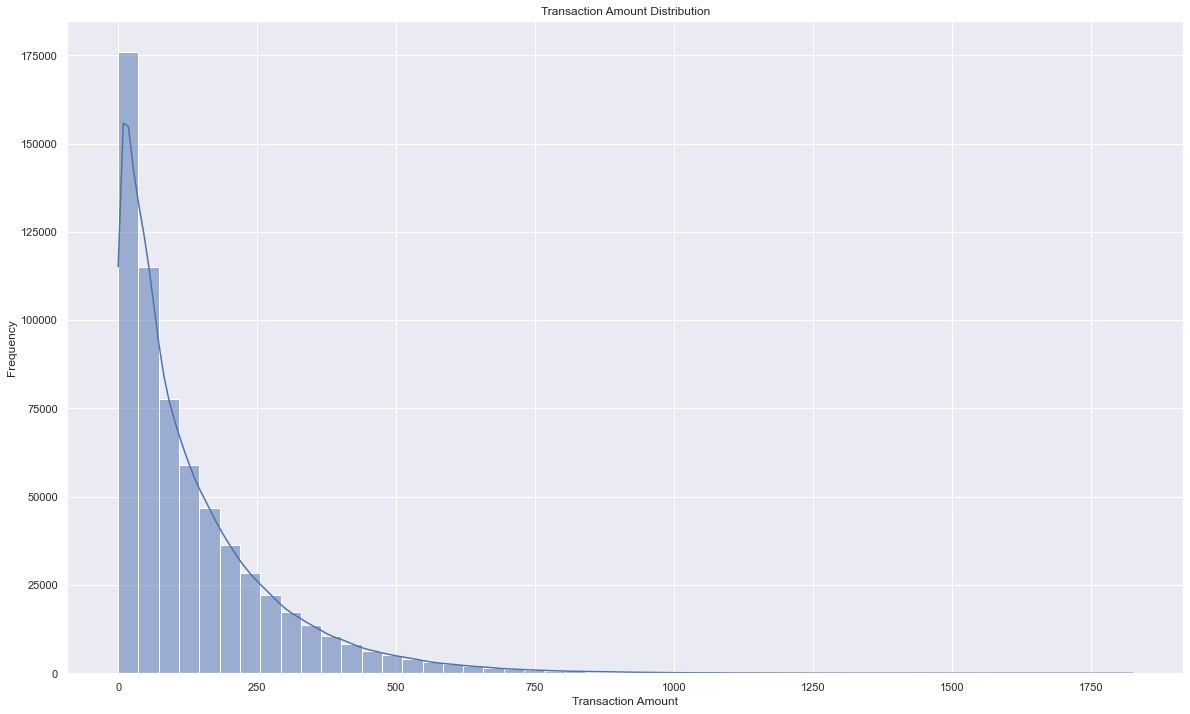

In [182]:
plt.figure(figsize=(20, 12))
sns.histplot(transaction['transactionAmount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

### 2) Histograms for different ranges of transactionAmount

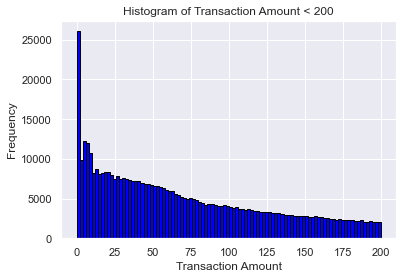

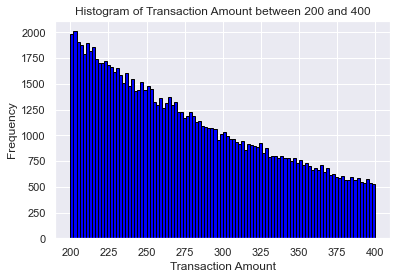

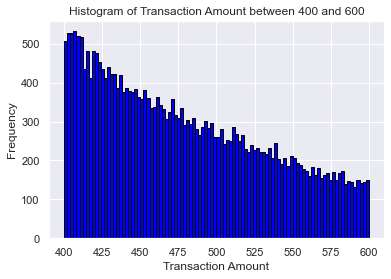

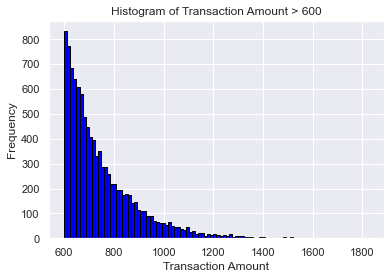

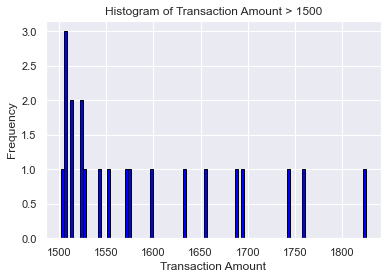

In [183]:
ranges = [(0, 200), (200, 400), (400, 600), (600, np.inf), (1500, np.inf)]
titles = [
    'Histogram of Transaction Amount < 200',
    'Histogram of Transaction Amount between 200 and 400',
    'Histogram of Transaction Amount between 400 and 600',
    'Histogram of Transaction Amount > 600',
    'Histogram of Transaction Amount > 1500'
]

for r, title in zip(ranges, titles):
    plt.hist(transaction[(transaction['transactionAmount'] >= r[0]) & (transaction['transactionAmount'] < r[1])]['transactionAmount'], bins=100, color='blue', edgecolor='black')
    plt.title(title)
    plt.xlabel('Transaction Amount')
    plt.ylabel('Frequency')
    plt.show()

### 3) Mean Transaction Amount by Merchant Category

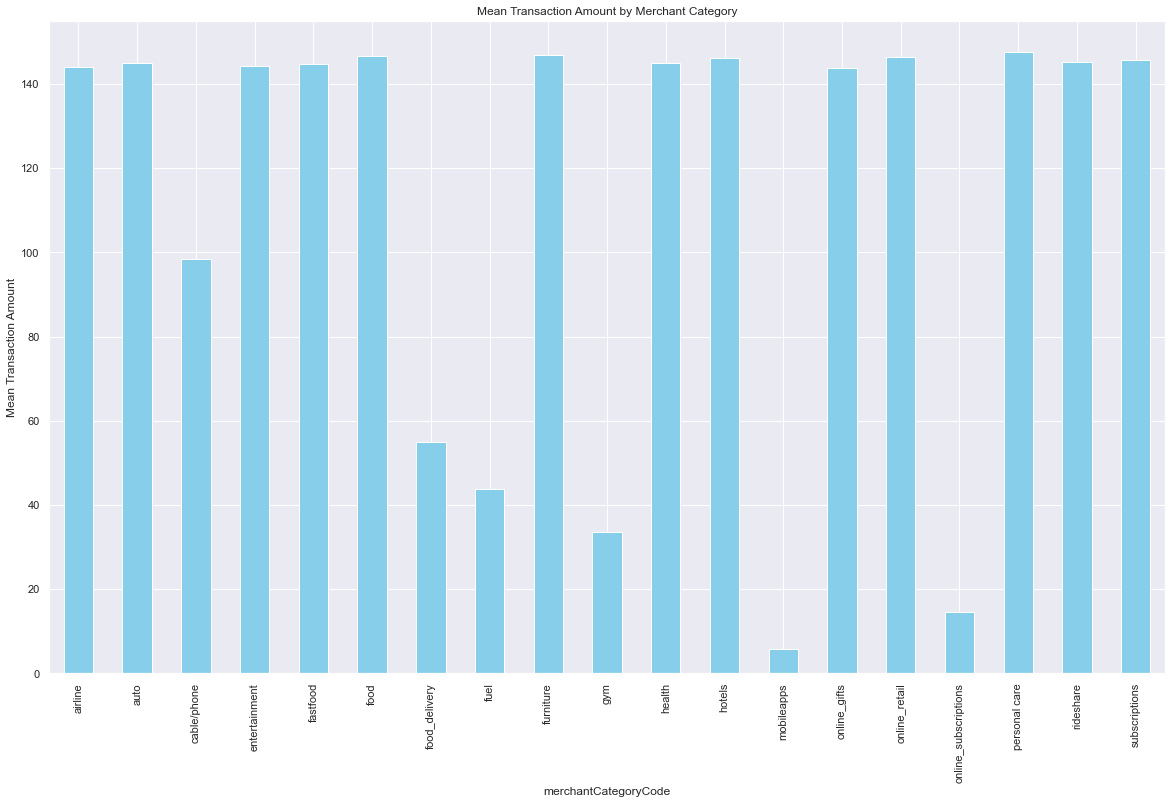

In [184]:
catmean = transaction.groupby('merchantCategoryCode')['transactionAmount'].mean()

ax = catmean.plot(kind='bar', figsize=(20, 12), color='skyblue')
ax.set_ylabel('Mean Transaction Amount')
ax.set_title('Mean Transaction Amount by Merchant Category')
plt.show()

### 4) Transaction Amount for Fraud and Non-Fraud Transactions

#### 4.1 Transaction Amount Distribution

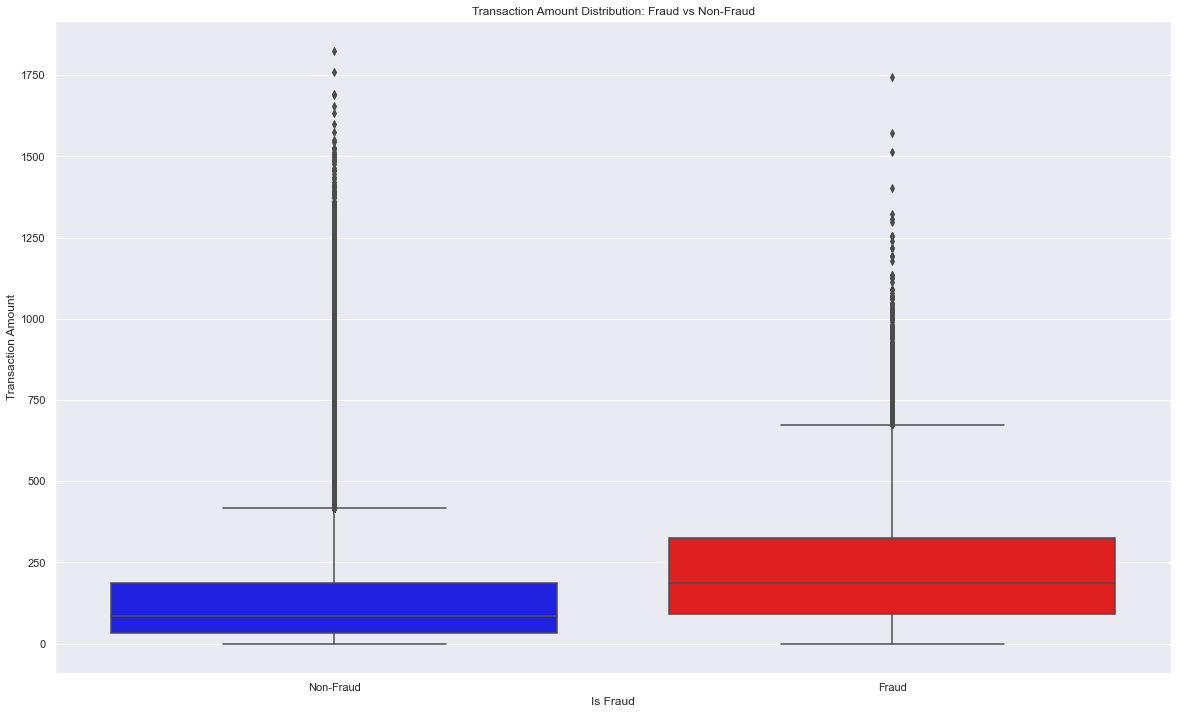

In [185]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='isFraud', y='transactionAmount', data=transaction, palette=['blue', 'red'])
plt.title('Transaction Amount Distribution: Fraud vs Non-Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Transaction Amount')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

#### 4.2 Mean Transaction Amount

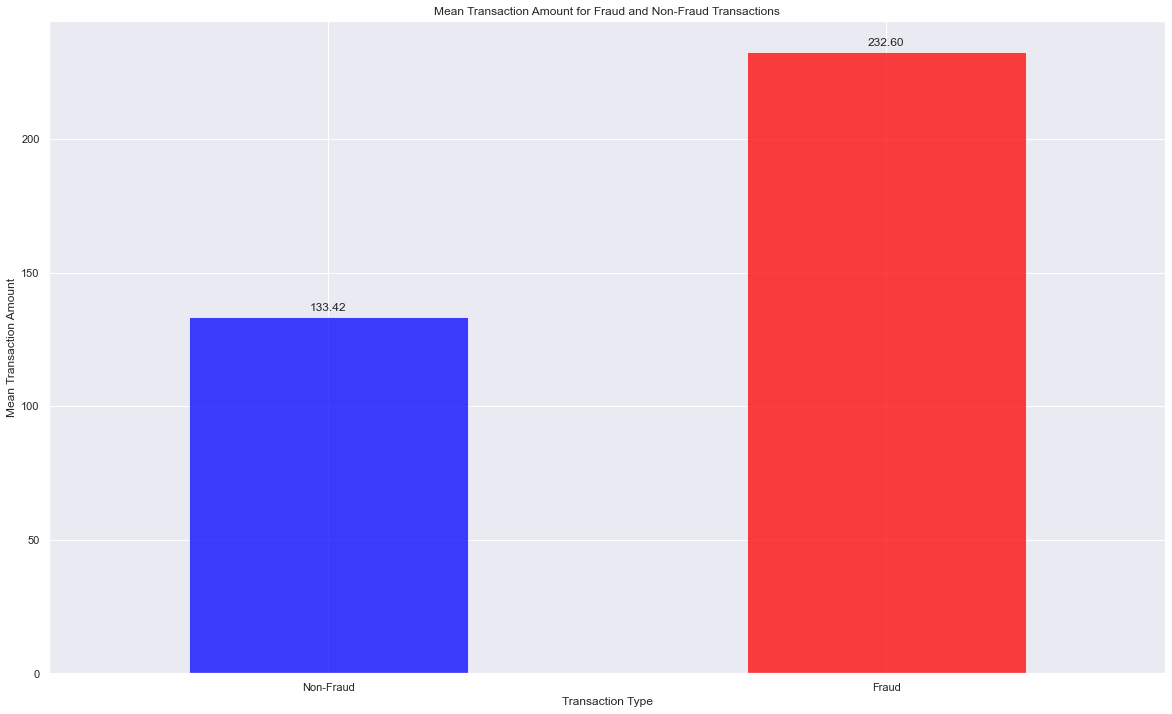

In [186]:
Fmean = transaction.groupby('isFraud')['transactionAmount'].mean()

plt.figure(figsize=(20, 12))
colors = ['blue', 'red']
ax = Fmean.plot(kind='bar', color=colors, alpha=0.75)

ax.set_ylabel('Mean Transaction Amount')
ax.set_xlabel('Transaction Type')
ax.set_title('Mean Transaction Amount for Fraud and Non-Fraud Transactions')
ax.set_xticklabels(['Non-Fraud', 'Fraud'], rotation=0)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.show()

Average amount for fraud transactions is around 232 and for not fraud transaction is much lesser which is 133. So, it is evident that fraud transactions are happening for higher amount while normal transactions have lesser average.

### 5) Transaction Count by Merchant Category

<Figure size 2880x864 with 0 Axes>

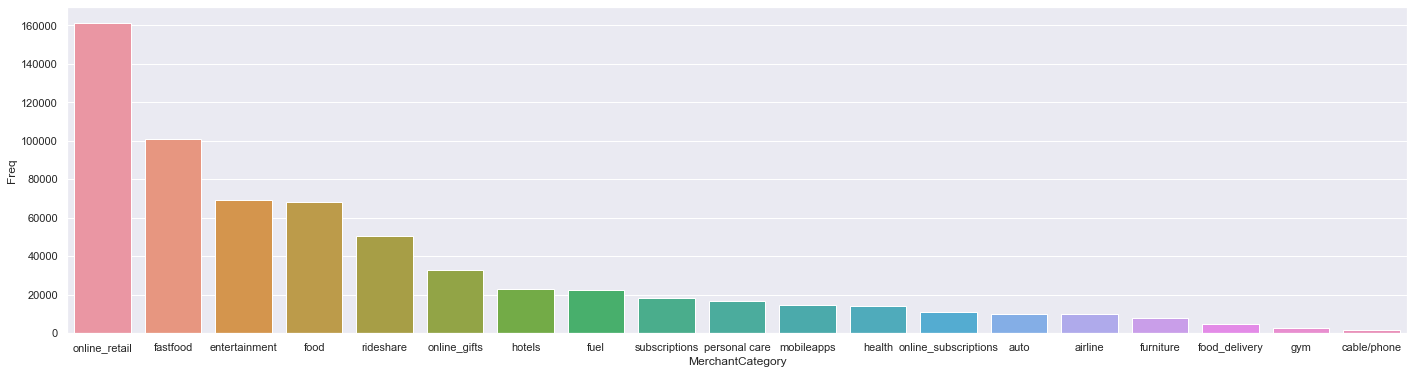

In [187]:
t=pd.DataFrame(transaction['merchantCategoryCode'].value_counts()).reset_index(drop=False)
t.columns=['MerchantCategory','Freq']
plt.figure(figsize=(40, 12))
plt.figure(figsize=(24,6))
sns.set_theme()
ax = sns.barplot(x="MerchantCategory", y="Freq", data=t)

### 6) Time Based Plots for Analysis

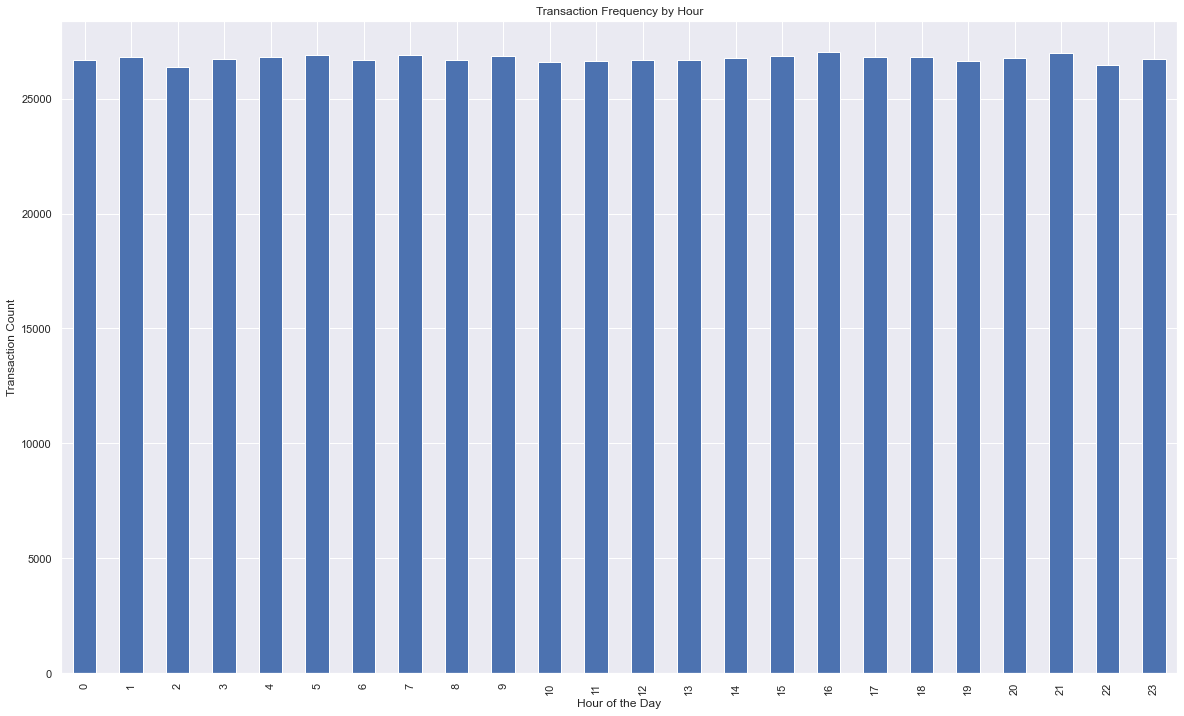

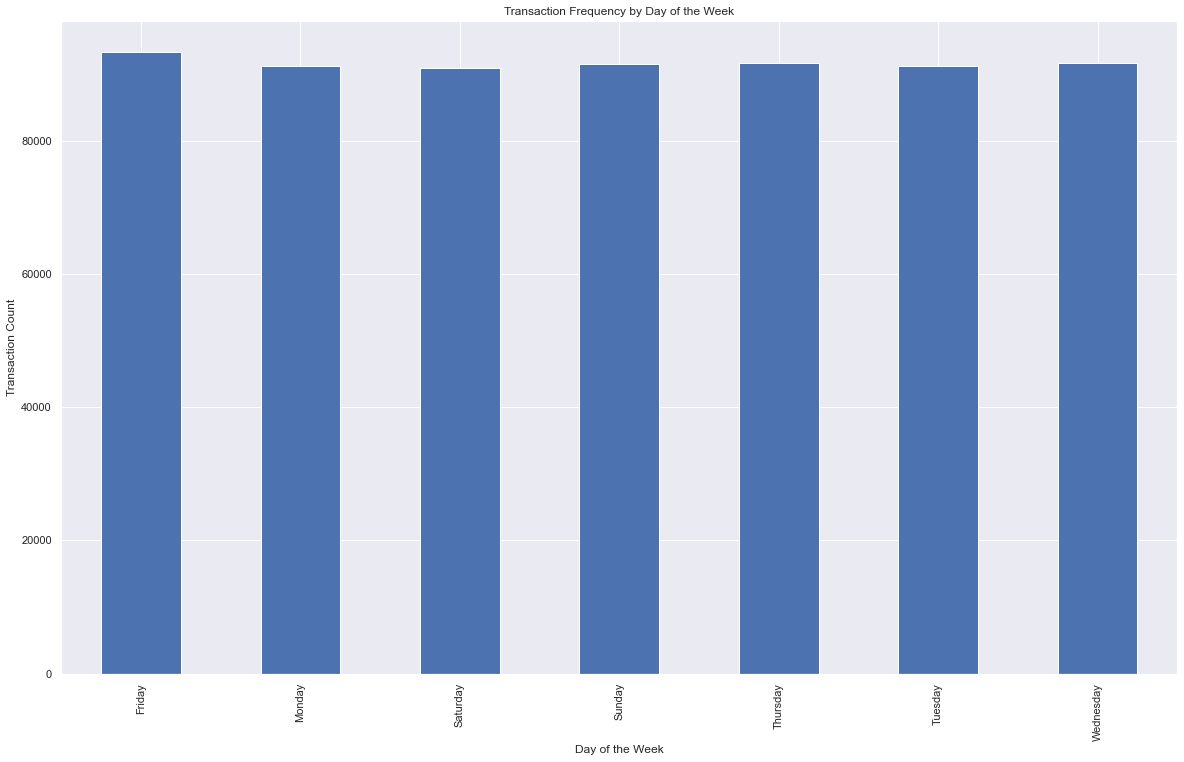

In [188]:
transaction['transactionHour'] = transaction['transactionDateTime'].dt.hour
plt.figure(figsize=(20, 12))
transaction['transactionHour'].value_counts().sort_index().plot(kind='bar')
plt.title('Transaction Frequency by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.show()


transaction['transactionDayOfWeek'] = transaction['transactionDateTime'].dt.day_name()
plt.figure(figsize=(20, 12))
transaction['transactionDayOfWeek'].value_counts().sort_index().plot(kind='bar')
plt.title('Transaction Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Transaction Count')
plt.show()

### 7) Transaction Count by Type

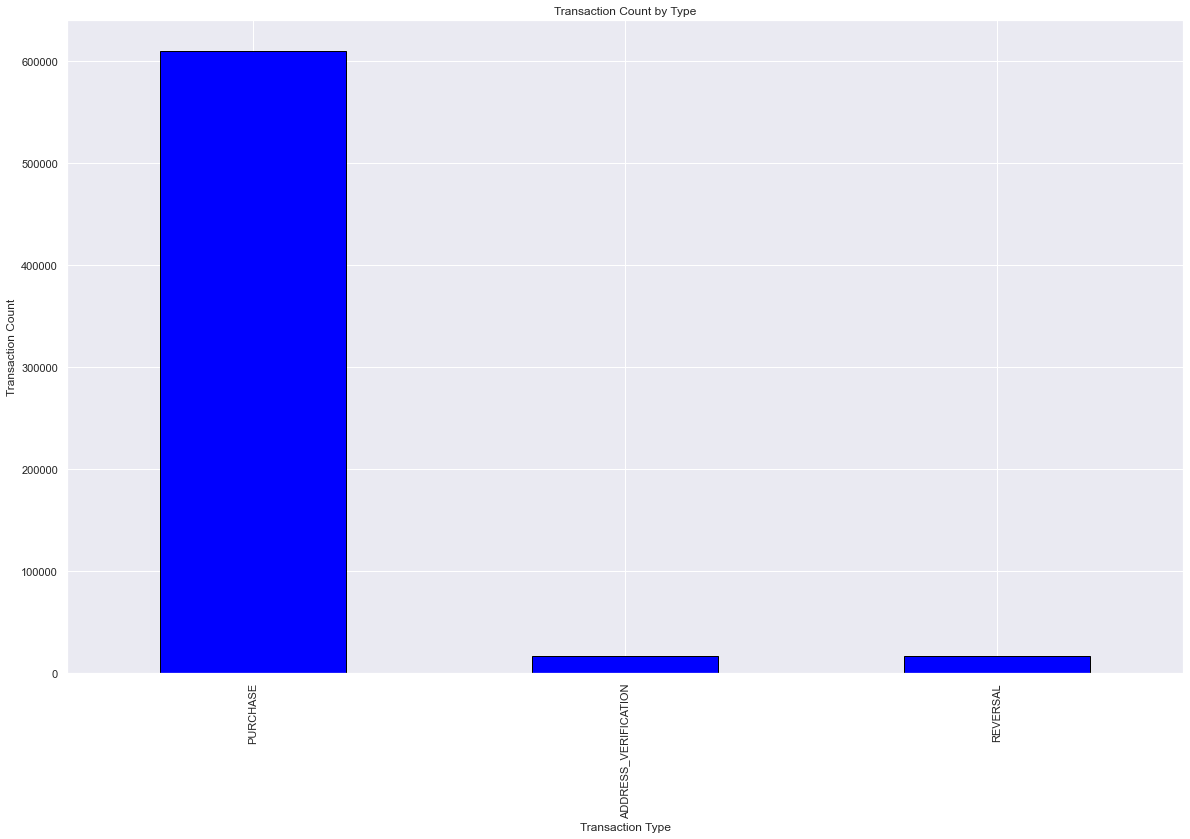

In [190]:
plt.figure(figsize=(20, 12))
transaction['transactionType'].value_counts().plot(kind='bar', color='blue', edgecolor='black')
plt.title('Transaction Count by Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.show()

### 8) Fraud Rate by Merchant Category

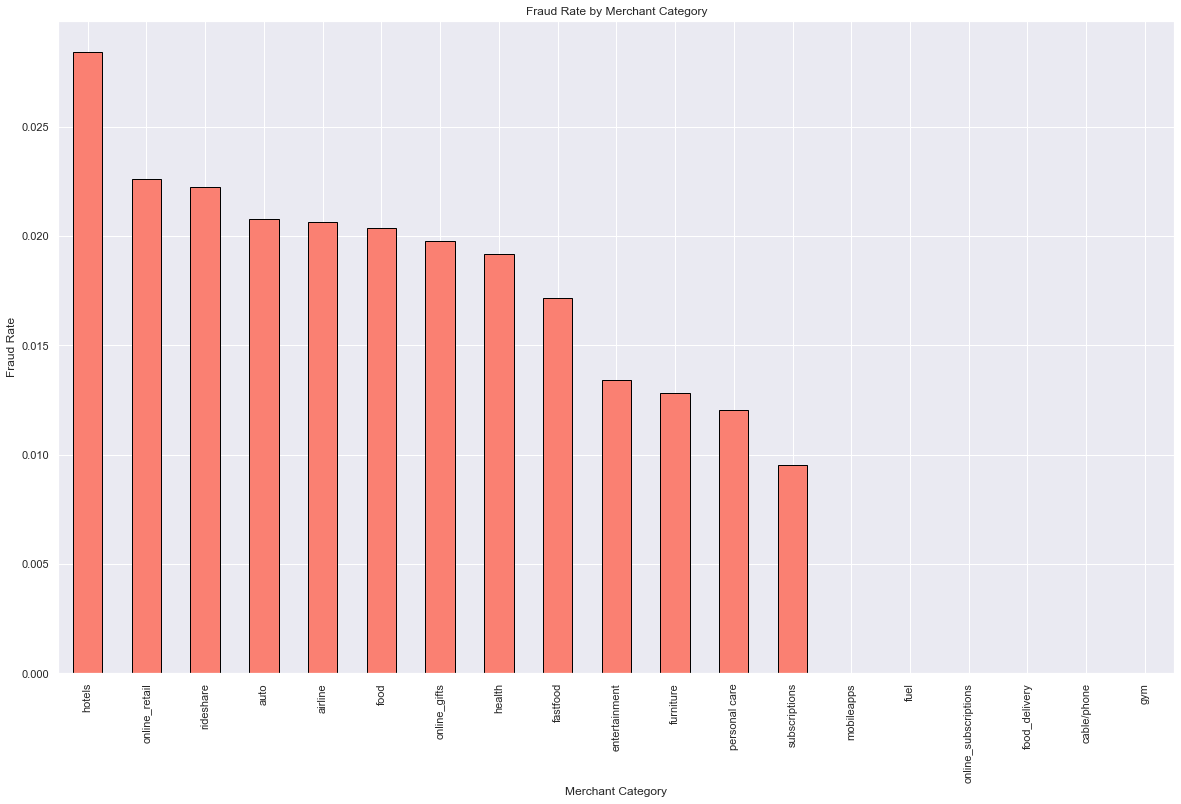

In [191]:
plt.figure(figsize=(20, 12))
fraud_rate = transaction.groupby('merchantCategoryCode')['isFraud'].mean().sort_values(ascending=False)
fraud_rate.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Fraud Rate by Merchant Category')
plt.xlabel('Merchant Category')
plt.ylabel('Fraud Rate')
plt.show()

### 9) Average Transaction Amount by Merchant Category: Fraud vs Non-Fraud

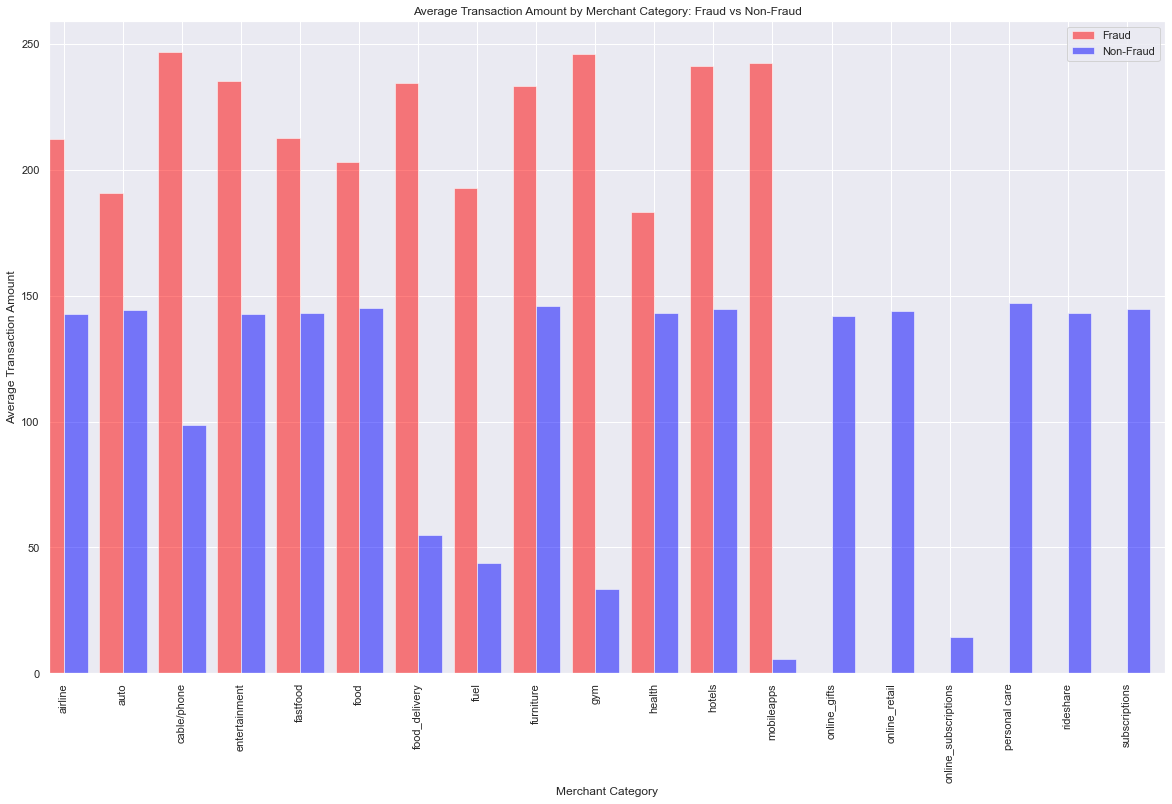

In [192]:
fraud_avg = transaction[transaction['isFraud'] == True].groupby('merchantCategoryCode')['transactionAmount'].mean()
non_fraud_avg = transaction[transaction['isFraud'] == False].groupby('merchantCategoryCode')['transactionAmount'].mean()

plt.figure(figsize=(20, 12))
fraud_avg.plot(kind='bar', color='red', alpha=0.5, position=1, width=0.4, label='Fraud')
non_fraud_avg.plot(kind='bar', color='blue', alpha=0.5, position=0, width=0.4, label='Non-Fraud')
plt.title('Average Transaction Amount by Merchant Category: Fraud vs Non-Fraud')
plt.xlabel('Merchant Category')
plt.ylabel('Average Transaction Amount')
plt.legend()
plt.show()

### 10) Transaction Count by Merchant Category: Fraud vs Non-Fraud

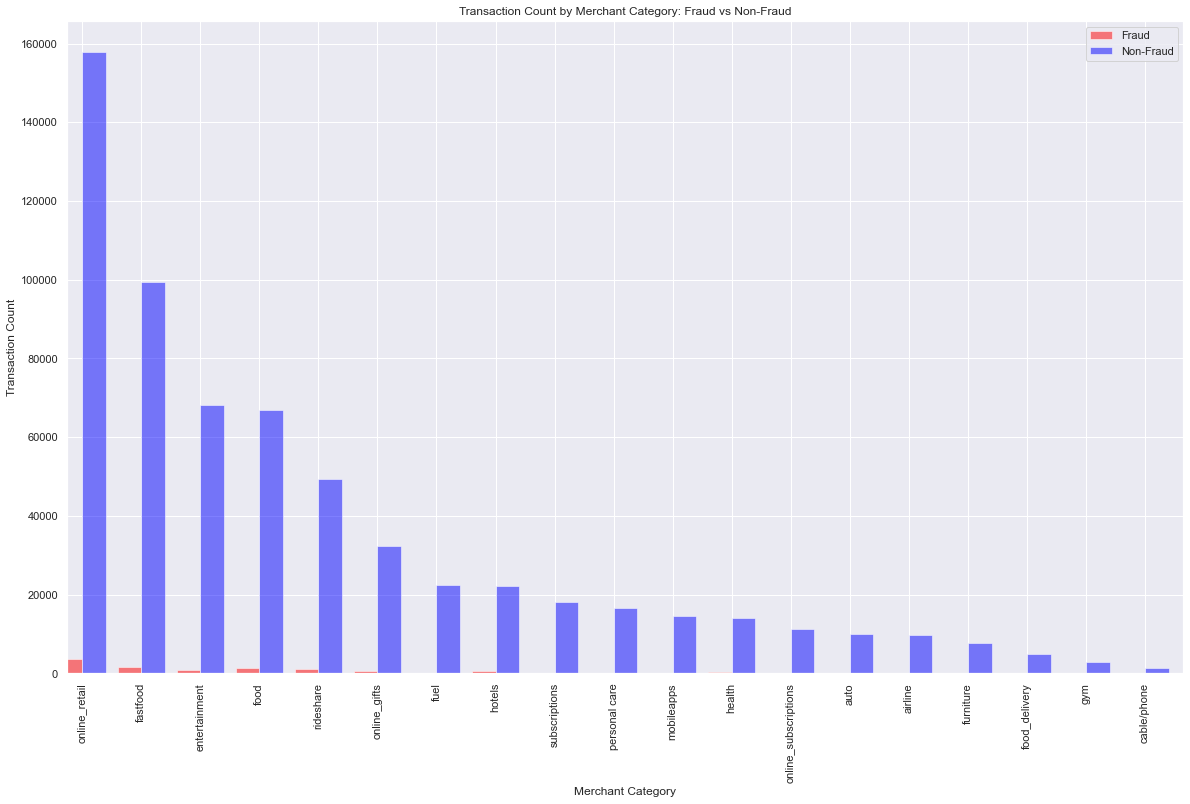

In [193]:
fraud_count = transaction[transaction['isFraud'] == True]['merchantCategoryCode'].value_counts()
non_fraud_count = transaction[transaction['isFraud'] == False]['merchantCategoryCode'].value_counts()

fraud_count = fraud_count.reindex(non_fraud_count.index)

plt.figure(figsize=(20, 12))
fraud_count.plot(kind='bar', color='red', alpha=0.5, position=1, width=0.4, label='Fraud')
non_fraud_count.plot(kind='bar', color='blue', alpha=0.5, position=0, width=0.4, label='Non-Fraud')
plt.title('Transaction Count by Merchant Category: Fraud vs Non-Fraud')
plt.xlabel('Merchant Category')
plt.ylabel('Transaction Count')
plt.legend()
plt.show()

### 11) Credit Limit Distribution: Fraud vs Non-Fraud

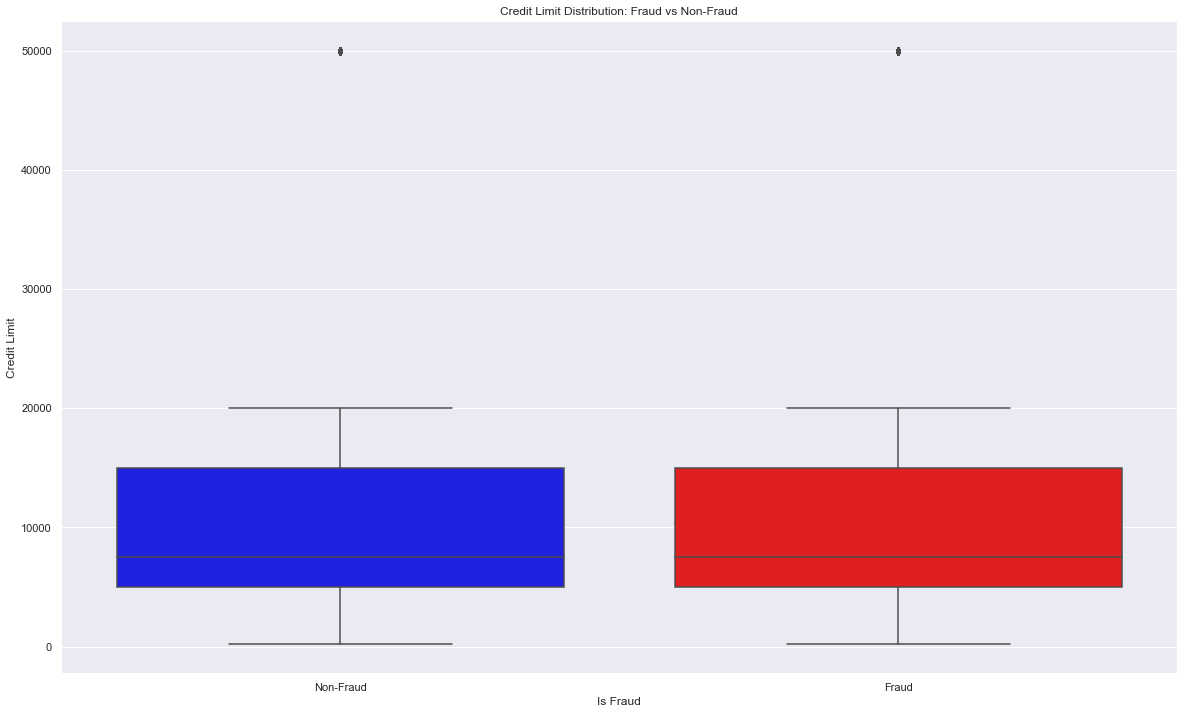

In [194]:
plt.figure(figsize=(20, 12))
sns.boxplot(x='isFraud', y='creditLimit', data=transaction, palette=['blue', 'red'])
plt.title('Credit Limit Distribution: Fraud vs Non-Fraud')
plt.xlabel('Is Fraud')
plt.ylabel('Credit Limit')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

### 12) Transaction Type Distribution: Fraud vs Non-Fraud

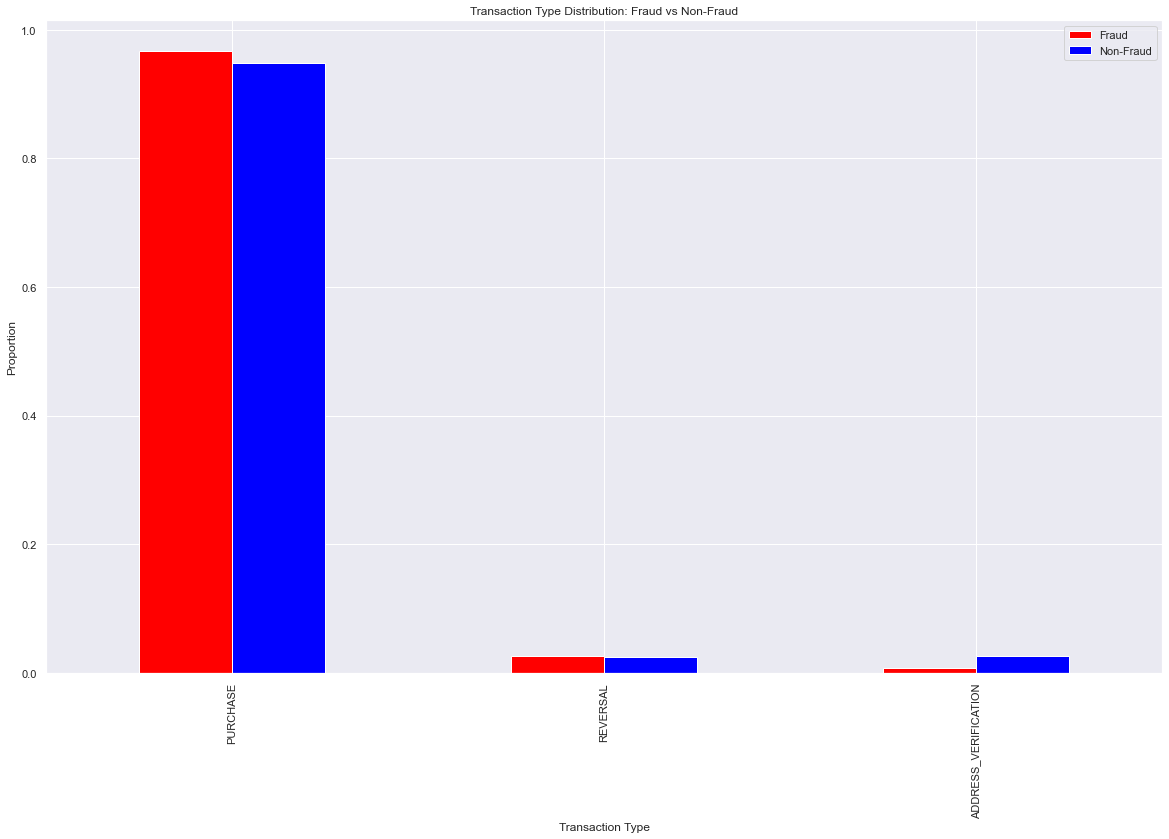

In [195]:
fraud_transaction_type = transaction[transaction['isFraud'] == True]['transactionType'].value_counts(normalize=True)
non_fraud_transaction_type = transaction[transaction['isFraud'] == False]['transactionType'].value_counts(normalize=True)

transaction_types = pd.concat([fraud_transaction_type, non_fraud_transaction_type], axis=1, keys=['Fraud', 'Non-Fraud'])
transaction_types.plot(kind='bar', figsize=(20, 12), color=['red', 'blue'])
plt.title('Transaction Type Distribution: Fraud vs Non-Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Proportion')
plt.show()

### 13) Distribution of Credit Limit

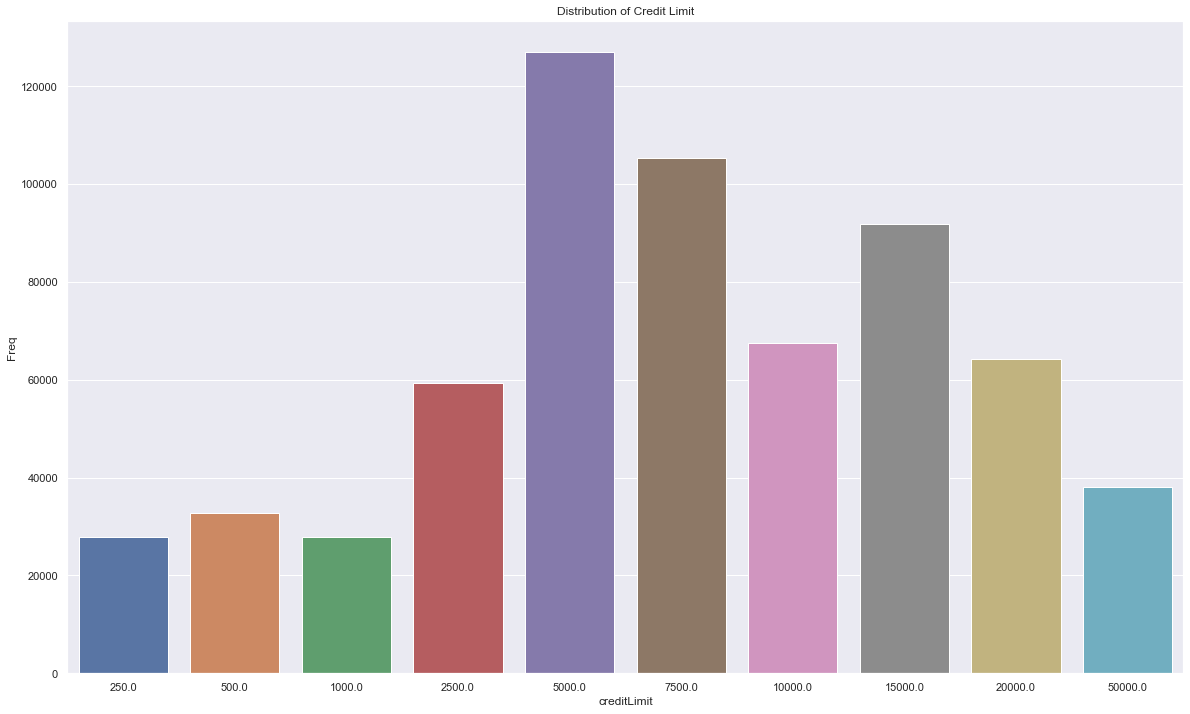

In [196]:
z=pd.DataFrame(transaction.groupby('creditLimit').count()['isFraud']).reset_index(drop=False)
z.columns=['creditLimit','Freq']
plt.figure(figsize=(20,12))
plt.title('Distribution of Credit Limit')
sns.set_theme() 
ax = sns.barplot(x="creditLimit", y="Freq", data=z)

### 14) Correlation Matrix

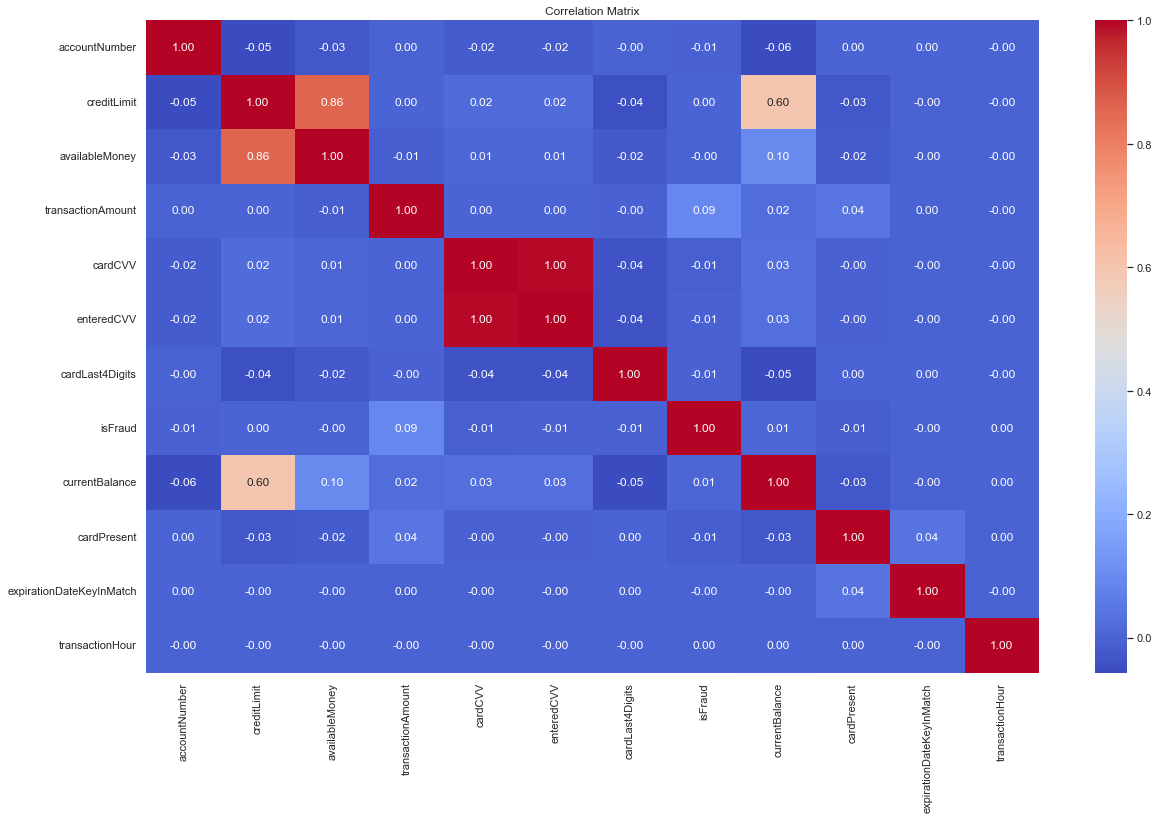

In [53]:
plt.figure(figsize=(20, 12))
sns.heatmap(transaction.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [54]:
transaction.dtypes

accountNumber                        int32
customerId                          object
creditLimit                        float64
availableMoney                     float64
transactionDateTime         datetime64[ns]
transactionAmount                  float64
merchantName                        object
acqCountry                          object
merchantCountryCode                 object
posEntryMode                        object
posConditionCode                    object
merchantCategoryCode                object
currentExpDate              datetime64[ns]
accountOpenDate             datetime64[ns]
dateOfLastAddressChange     datetime64[ns]
cardCVV                              int32
enteredCVV                           int32
cardLast4Digits                      int32
transactionType                     object
isFraud                               bool
currentBalance                     float64
cardPresent                           bool
expirationDateKeyInMatch              bool
transaction

In [55]:
transaction.groupby('merchantCategoryCode').size()

merchantCategoryCode
airline                   9990
auto                     10147
cable/phone               1490
entertainment            69138
fastfood                101196
food                     68245
food_delivery             4990
fuel                     22566
furniture                 7813
gym                       2874
health                   14344
hotels                   22879
mobileapps               14614
online_gifts             33045
online_retail           161469
online_subscriptions     11247
personal care            16917
rideshare                50574
subscriptions            18376
dtype: int64

In [56]:
transaction.groupby('transactionType').size()

transactionType
ADDRESS_VERIFICATION     16478
PURCHASE                609274
REVERSAL                 16162
dtype: int64

In [58]:
transaction.head(500)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,transactionHour,transactionDayOfWeek
0,733493772,733493772,5000.0,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,05,01,rideshare,2020-04-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,0.00,False,False,19,Friday
1,733493772,733493772,5000.0,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,09,01,rideshare,2023-06-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,111.33,False,False,22,Saturday
2,733493772,733493772,5000.0,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,05,01,rideshare,2027-12-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,136.08,False,False,13,Monday
3,733493772,733493772,5000.0,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,02,01,rideshare,2029-09-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,323.48,False,False,22,Monday
4,733493772,733493772,5000.0,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,02,01,rideshare,2024-10-01,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False,1,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,770957922,770957922,250.0,91.69,2016-03-27 14:47:20,209.35,oldnavy.com,US,US,09,01,online_retail,2024-07-01,2013-01-10,2013-01-10,822,822,757,PURCHASE,False,158.31,False,False,14,Sunday
496,770957922,770957922,250.0,250.00,2016-03-31 00:53:27,145.07,alibaba.com,US,US,02,01,online_retail,2029-02-01,2013-01-10,2013-01-10,822,822,757,PURCHASE,False,0.00,False,False,0,Thursday
497,770957922,770957922,250.0,250.00,2016-04-02 07:53:37,413.80,Hyatt House #862691,US,US,05,08,hotels,2028-04-01,2013-01-10,2013-01-10,453,453,5583,PURCHASE,False,0.00,True,False,7,Saturday
498,770957922,770957922,250.0,2.67,2016-04-04 14:24:29,20.38,Renaissance Hotel #600476,US,US,02,01,hotels,2019-03-01,2013-01-10,2013-01-10,453,453,5583,PURCHASE,False,247.33,True,False,14,Monday


### Identifying Reversal Transactions

In [59]:
rev = transaction[transaction['transactionType'] == 'REVERSAL']

print('Number of reversed transactions:', len(rev))
print('Percentage of reversed transactions: ', len(rev) / len(transaction) * 100, '%')
print('Total amount of reversed transactions:', rev['transactionAmount'].sum())
print('Fraction of reversed transactions: ', rev['transactionAmount'].sum() / transaction['transactionAmount'].sum())

Number of reversed transactions: 16162
Percentage of reversed transactions:  2.517782755945501 %
Total amount of reversed transactions: 2242915.0999999996
Fraction of reversed transactions:  0.025851144829800617


### Identifying Multi-Swipe Duplicated Transactions

In [60]:
transaction['duplicated'] = (
    (transaction['transactionType'] != 'REVERSAL') &
    (transaction['merchantCategoryCode'] == transaction['merchantCategoryCode'].shift(1)) &
    (transaction['merchantName'] == transaction['merchantName'].shift(1)) &
    (transaction['transactionAmount'] == transaction['transactionAmount'].shift(1)) &
    (transaction['accountNumber'] == transaction['accountNumber']) &
    ((transaction['transactionDateTime'] - transaction['transactionDateTime'].shift(1)) / np.timedelta64(1, 'D') <= 1)
)

In [61]:
transaction.head(500)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,isFraud,currentBalance,cardPresent,expirationDateKeyInMatch,transactionHour,transactionDayOfWeek,duplicated
0,733493772,733493772,5000.0,5000.00,2016-01-08 19:04:50,111.33,Lyft,US,US,05,01,rideshare,2020-04-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,0.00,False,False,19,Friday,False
1,733493772,733493772,5000.0,4888.67,2016-01-09 22:32:39,24.75,Uber,US,US,09,01,rideshare,2023-06-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,111.33,False,False,22,Saturday,False
2,733493772,733493772,5000.0,4863.92,2016-01-11 13:36:55,187.40,Lyft,US,US,05,01,rideshare,2027-12-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,False,136.08,False,False,13,Monday,False
3,733493772,733493772,5000.0,4676.52,2016-01-11 22:47:46,227.34,Lyft,US,US,02,01,rideshare,2029-09-01,2014-08-03,2014-08-03,492,492,9184,PURCHASE,True,323.48,False,False,22,Monday,False
4,733493772,733493772,5000.0,4449.18,2016-01-16 01:41:11,0.00,Lyft,US,US,02,01,rideshare,2024-10-01,2014-08-03,2014-08-03,492,492,9184,ADDRESS_VERIFICATION,False,550.82,False,False,1,Saturday,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,770957922,770957922,250.0,91.69,2016-03-27 14:47:20,209.35,oldnavy.com,US,US,09,01,online_retail,2024-07-01,2013-01-10,2013-01-10,822,822,757,PURCHASE,False,158.31,False,False,14,Sunday,False
496,770957922,770957922,250.0,250.00,2016-03-31 00:53:27,145.07,alibaba.com,US,US,02,01,online_retail,2029-02-01,2013-01-10,2013-01-10,822,822,757,PURCHASE,False,0.00,False,False,0,Thursday,False
497,770957922,770957922,250.0,250.00,2016-04-02 07:53:37,413.80,Hyatt House #862691,US,US,05,08,hotels,2028-04-01,2013-01-10,2013-01-10,453,453,5583,PURCHASE,False,0.00,True,False,7,Saturday,False
498,770957922,770957922,250.0,2.67,2016-04-04 14:24:29,20.38,Renaissance Hotel #600476,US,US,02,01,hotels,2019-03-01,2013-01-10,2013-01-10,453,453,5583,PURCHASE,False,247.33,True,False,14,Monday,False


In [62]:
duplicated_transactions = transaction[transaction['duplicated']]
print('Number of duplicated transactions:', len(duplicated_transactions))
print('Percentage of duplicated transactions:', len(duplicated_transactions) / len(transaction) * 100, '%')
print('Total amount of duplicated transactions:', duplicated_transactions['transactionAmount'].sum())
print('Fraction of duplicated transactions:', duplicated_transactions['transactionAmount'].sum() / transaction['transactionAmount'].sum())

Number of duplicated transactions: 6175
Percentage of duplicated transactions: 0.9619668678358784 %
Total amount of duplicated transactions: 884708.1199999999
Fraction of duplicated transactions: 0.010196871804118055


In [63]:
# transaction = transaction.drop(['transactionDateTime', 'currentExpDate', 'dateOfLastAddressChange', 'accountOpenDate'], axis=1)

#### Pearson correlation for numerical variables

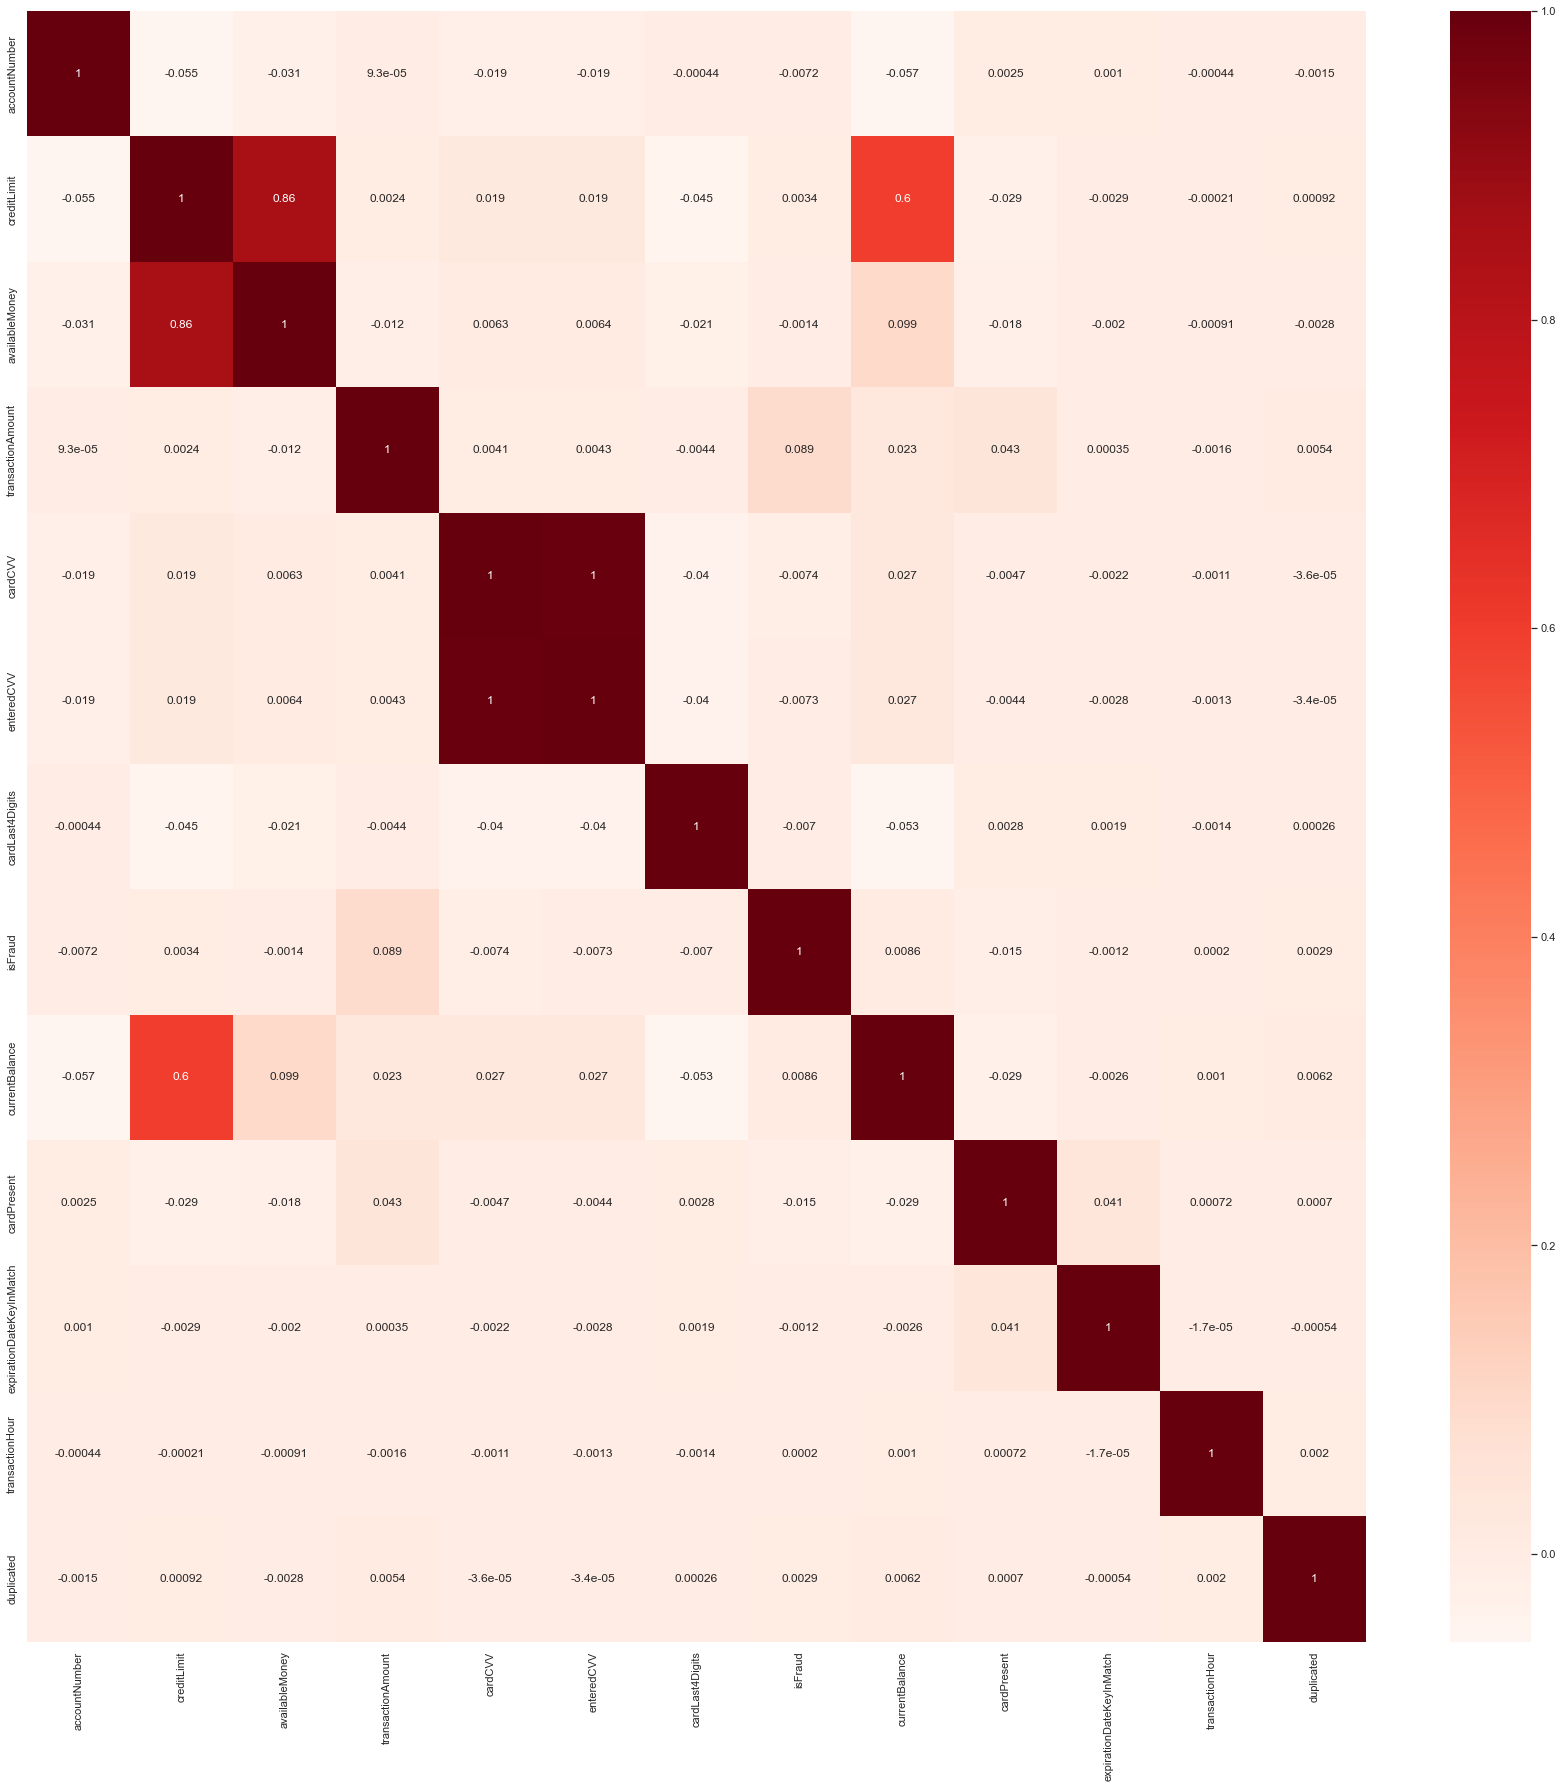

In [64]:
plt.figure(figsize=(30, 30))
cor = transaction.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#### Cramér's V for categorical variables

In [ ]:
def cramers_corrected_stat(confusion_matrix):
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))    
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))

#### Reference: 
1) https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V </br>
2) https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix

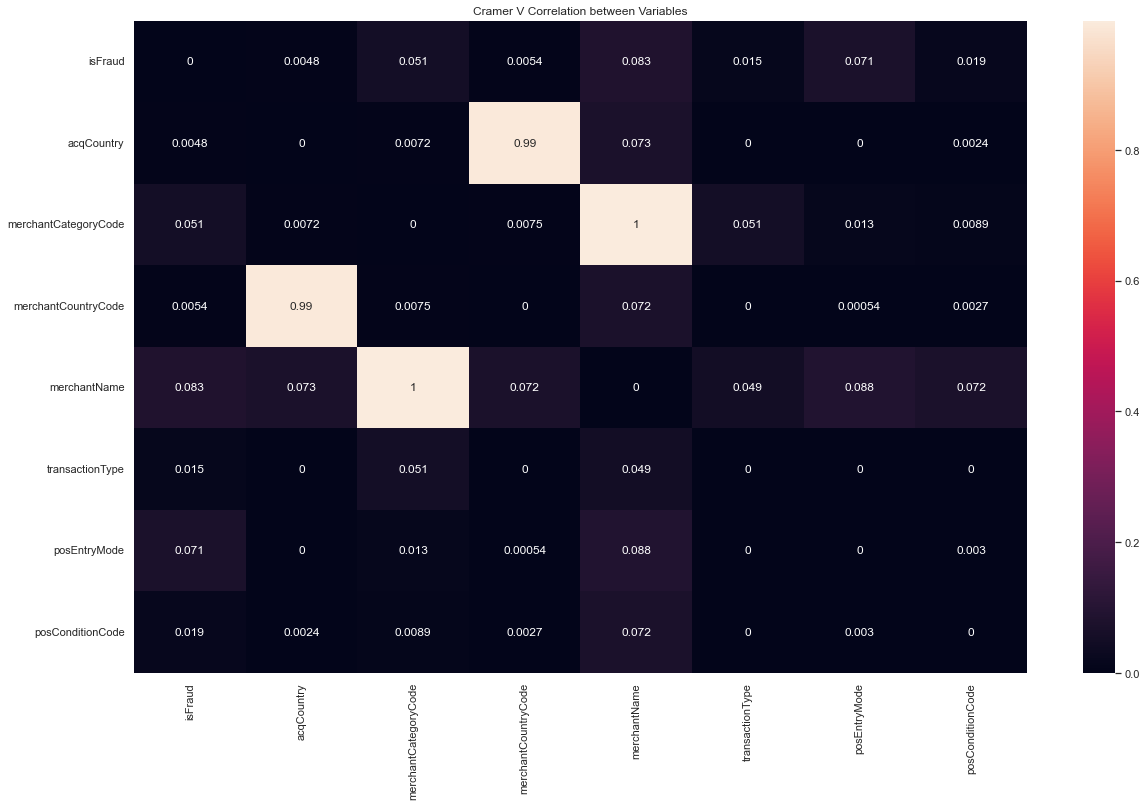

In [68]:
catCols = ['isFraud', 'acqCountry', 'merchantCategoryCode', 'merchantCountryCode', 'merchantName', 'transactionType', 'posEntryMode', 'posConditionCode']
corrM = np.zeros((len(catCols), len(catCols)))
for col1, col2 in itertools.combinations(catCols, 2):
    idx1, idx2 = catCols.index(col1), catCols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(transaction[col1], transaction[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]
    
    
corrCat = pd.DataFrame(corrM, index=catCols, columns=catCols)
fig, ax = plt.subplots(figsize=(20, 12))
ax = sns.heatmap(corrCat, annot=True, ax=ax)
ax.set_title("Cramer V Correlation between Variables")
plt.show()

In [69]:
cor_target_num = abs(cor["isFraud"])
relevant_features_num = cor_target_num[cor_target_num >= 0.008]
print(relevant_features_num)

cor_target_cat = corrCat["isFraud"]
relevant_features_cat = cor_target_cat[cor_target_cat >= 0.008]
print(relevant_features_cat)

transactionAmount    0.088708
isFraud              1.000000
currentBalance       0.008611
cardPresent          0.014946
Name: isFraud, dtype: float64
merchantCategoryCode    0.051460
merchantName            0.082775
transactionType         0.015113
posEntryMode            0.070797
posConditionCode        0.019179
Name: isFraud, dtype: float64


In [70]:
print(cor_target_num[cor_target_num < 0.008])
print(cor_target_cat[cor_target_cat < 0.008])

accountNumber               0.007157
creditLimit                 0.003357
availableMoney              0.001379
cardCVV                     0.007402
enteredCVV                  0.007347
cardLast4Digits             0.007010
expirationDateKeyInMatch    0.001239
transactionHour             0.000196
duplicated                  0.002946
Name: isFraud, dtype: float64
isFraud                0.000000
acqCountry             0.004810
merchantCountryCode    0.005386
Name: isFraud, dtype: float64


In [71]:
transaction=transaction.drop(['accountNumber','creditLimit','availableMoney','cardCVV','enteredCVV','cardLast4Digits','expirationDateKeyInMatch','transactionHour','duplicated','acqCountry','merchantCountryCode'],axis=1)  

#### Extracting numerical values from non numerical columns for model training

In [72]:
transaction['day_of_trans'] = transaction['transactionDateTime'].dt.day
transaction['month_of_trans'] = transaction['transactionDateTime'].dt.month
transaction['year_of_trans'] = transaction['transactionDateTime'].dt.year
transaction['hour_of_trans'] = transaction['transactionDateTime'].dt.hour
transaction['week_of_trans'] = transaction['transactionDateTime'].dt.day_name()

transaction['age_of_acnt'] = (transaction['transactionDateTime'] - transaction['accountOpenDate']) / np.timedelta64(1, 'D')
transaction['age_rem'] = (transaction['currentExpDate'] - transaction['transactionDateTime']) / np.timedelta64(1, 'D')
transaction['addr_change'] = (transaction['transactionDateTime'] - transaction['dateOfLastAddressChange']) / np.timedelta64(1, 'D')

In [73]:
transaction.head()

,customerId,transactionDateTime,transactionAmount,merchantName,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,transactionType,isFraud,currentBalance,cardPresent,transactionDayOfWeek,day_of_trans,month_of_trans,year_of_trans,hour_of_trans,week_of_trans,age_of_acnt,age_rem,addr_change
0,733493772,2016-01-08 19:04:50,111.33,Lyft,05,01,rideshare,2020-04-01,2014-08-03,2014-08-03,PURCHASE,True,0.00,False,Friday,8,1,2016,19,Friday,523.795023,1544.204977,523.795023
1,733493772,2016-01-09 22:32:39,24.75,Uber,09,01,rideshare,2023-06-01,2014-08-03,2014-08-03,PURCHASE,False,111.33,False,Saturday,9,1,2016,22,Saturday,524.939340,2699.060660,524.939340
2,733493772,2016-01-11 13:36:55,187.40,Lyft,05,01,rideshare,2027-12-01,2014-08-03,2014-08-03,PURCHASE,False,136.08,False,Monday,11,1,2016,13,Monday,526.567303,4341.432697,526.567303
3,733493772,2016-01-11 22:47:46,227.34,Lyft,02,01,rideshare,2029-09-01,2014-08-03,2014-08-03,PURCHASE,True,323.48,False,Monday,11,1,2016,22,Monday,526.949838,4981.050162,526.949838
4,733493772,2016-01-16 01:41:11,0.00,Lyft,02,01,rideshare,2024-10-01,2014-08-03,2014-08-03,ADDRESS_VERIFICATION,False,550.82,False,Saturday,16,1,2016,1,Saturday,531.070266,3180.929734,531.070266


In [74]:
transaction = transaction.drop(['transactionDateTime', 'currentExpDate', 'dateOfLastAddressChange', 'accountOpenDate', 'transactionDayOfWeek'], axis=1)

### One Hot Encoding of Categorical Variables

In [75]:
transaction = pd.get_dummies(transaction, columns=['transactionType', 'merchantCategoryCode', 'posEntryMode', 'posConditionCode', 'week_of_trans'], drop_first=False)

In [76]:
transaction.head()

,customerId,transactionAmount,merchantName,isFraud,currentBalance,cardPresent,day_of_trans,month_of_trans,year_of_trans,hour_of_trans,age_of_acnt,age_rem,addr_change,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,merchantCategoryCode_airline,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,posEntryMode_00,posEntryMode_02,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_01,posConditionCode_08,posConditionCode_99,week_of_trans_Friday,week_of_trans_Monday,week_of_trans_Saturday,week_of_trans_Sunday,week_of_trans_Thursday,week_of_trans_Tuesday,week_of_trans_Wednesday
0,733493772,111.33,Lyft,True,0.00,False,8,1,2016,19,523.795023,1544.204977,523.795023,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,733493772,24.75,Uber,False,111.33,False,9,1,2016,22,524.939340,2699.060660,524.939340,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
2,733493772,187.40,Lyft,False,136.08,False,11,1,2016,13,526.567303,4341.432697,526.567303,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,733493772,227.34,Lyft,True,323.48,False,11,1,2016,22,526.949838,4981.050162,526.949838,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,733493772,0.00,Lyft,False,550.82,False,16,1,2016,1,531.070266,3180.929734,531.070266,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0


In [77]:
transaction.dtypes

customerId                                    object
transactionAmount                            float64
merchantName                                  object
isFraud                                         bool
currentBalance                               float64
cardPresent                                     bool
day_of_trans                                   int64
month_of_trans                                 int64
year_of_trans                                  int64
hour_of_trans                                  int64
age_of_acnt                                  float64
age_rem                                      float64
addr_change                                  float64
transactionType_ADDRESS_VERIFICATION           uint8
transactionType_PURCHASE                       uint8
transactionType_REVERSAL                       uint8
merchantCategoryCode_airline                   uint8
merchantCategoryCode_auto                      uint8
merchantCategoryCode_cable/phone              

In [78]:
transaction.merchantName.nunique()

2493

In [79]:
transaction = transaction.drop(['customerId', 'merchantName'], axis=1)

In [80]:
transaction.dtypes

transactionAmount                            float64
isFraud                                         bool
currentBalance                               float64
cardPresent                                     bool
day_of_trans                                   int64
month_of_trans                                 int64
year_of_trans                                  int64
hour_of_trans                                  int64
age_of_acnt                                  float64
age_rem                                      float64
addr_change                                  float64
transactionType_ADDRESS_VERIFICATION           uint8
transactionType_PURCHASE                       uint8
transactionType_REVERSAL                       uint8
merchantCategoryCode_airline                   uint8
merchantCategoryCode_auto                      uint8
merchantCategoryCode_cable/phone               uint8
merchantCategoryCode_entertainment             uint8
merchantCategoryCode_fastfood                 

In [81]:
transaction.head(200)

,transactionAmount,isFraud,currentBalance,cardPresent,day_of_trans,month_of_trans,year_of_trans,hour_of_trans,age_of_acnt,age_rem,addr_change,transactionType_ADDRESS_VERIFICATION,transactionType_PURCHASE,transactionType_REVERSAL,merchantCategoryCode_airline,merchantCategoryCode_auto,merchantCategoryCode_cable/phone,merchantCategoryCode_entertainment,merchantCategoryCode_fastfood,merchantCategoryCode_food,merchantCategoryCode_food_delivery,merchantCategoryCode_fuel,merchantCategoryCode_furniture,merchantCategoryCode_gym,merchantCategoryCode_health,merchantCategoryCode_hotels,merchantCategoryCode_mobileapps,merchantCategoryCode_online_gifts,merchantCategoryCode_online_retail,merchantCategoryCode_online_subscriptions,merchantCategoryCode_personal care,merchantCategoryCode_rideshare,merchantCategoryCode_subscriptions,posEntryMode_00,posEntryMode_02,posEntryMode_05,posEntryMode_09,posEntryMode_80,posEntryMode_90,posConditionCode_01,posConditionCode_08,posConditionCode_99,week_of_trans_Friday,week_of_trans_Monday,week_of_trans_Saturday,week_of_trans_Sunday,week_of_trans_Thursday,week_of_trans_Tuesday,week_of_trans_Wednesday
0,111.33,True,0.00,False,8,1,2016,19,523.795023,1544.204977,523.795023,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0
1,24.75,False,111.33,False,9,1,2016,22,524.939340,2699.060660,524.939340,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0
2,187.40,False,136.08,False,11,1,2016,13,526.567303,4341.432697,526.567303,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
3,227.34,True,323.48,False,11,1,2016,22,526.949838,4981.050162,526.949838,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,0.00,False,550.82,False,16,1,2016,1,531.070266,3180.929734,531.070266,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0
5,9.80,False,550.82,False,16,1,2016,21,531.899618,1842.100382,531.899618,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0
6,247.99,False,560.62,False,24,1,2016,7,539.329178,3629.670822,539.329178,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
7,0.00,False,808.61,False,26,1,2016,5,541.228056,5787.771944,541.228056,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
8,11.54,False,808.61,True,26,1,2016,12,541.512662,2987.487338,541.512662,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0
9,11.54,False,820.15,True,26,1,2016,12,541.513368,2987.486632,541.513368,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0


## Model Training

In [82]:
actCount=transaction.groupby('isFraud').size()
actCount/len(transaction)*100

isFraud
False    98.239328
True      1.760672
dtype: float64

As this is fraud detection algorithm and odds of having fraud transactions are very less, we have highly unbalanced dataset

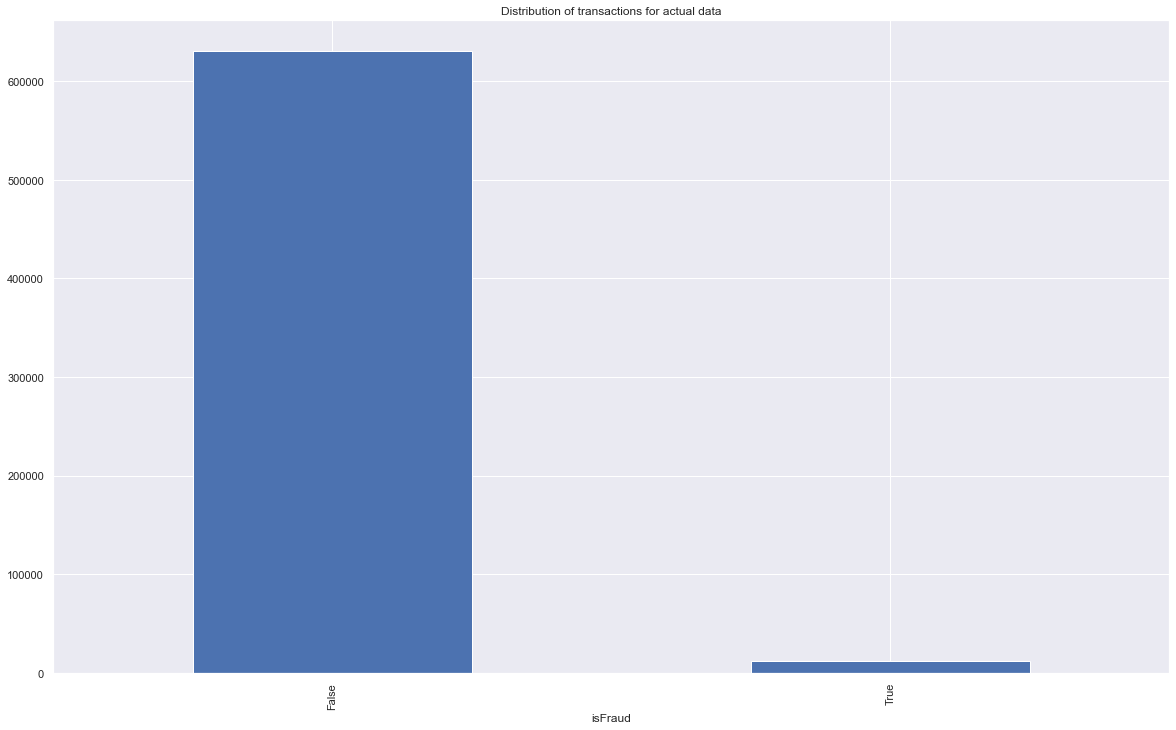

In [83]:
ax = actCount.plot(kind = 'bar',figsize=(20,12),title='Distribution of transactions for actual data')
plt.show()

### Model Training on Unbalanced Data to see Results

In [84]:
target=transaction['isFraud']
finaldf=transaction.drop(['isFraud'],axis=1)

In [85]:
train_features, test_features, train_labels, test_labels = train_test_split(finaldf, target, test_size=0.25, random_state=42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (481435, 48)
Training Labels Shape: (481435,)
Testing Features Shape: (160479, 48)
Testing Labels Shape: (160479,)


#### Using Random Forest Classifier

In [86]:
clf = RandomForestClassifier(random_state=42)
clf.fit(train_features, train_labels)

RandomForestClassifier(random_state=42)

In [87]:
preds = clf.predict(test_features)
preds_train = clf.predict(train_features)

In [88]:
print("Training Accuracy:", accuracy_score(train_labels, preds_train) * 100)
print("Testing Accuracy:", accuracy_score(test_labels, preds) * 100)
print("Precision Score:", precision_score(test_labels, preds))
print("Recall Score:", recall_score(test_labels, preds))
print("Confusion Matrix:\n", pd.crosstab(test_labels, preds, rownames=['Actual'], colnames=['Predicted']))

Training Accuracy: 99.99522261572174
Testing Accuracy: 98.22718237277151
Precision Score: 0.9607843137254902
Recall Score: 0.0169432918395574
Confusion Matrix:
 Predicted   False  True
Actual                 
False      157585     2
True         2843    49


In [89]:
print(classification_report(test_labels, preds))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99    157587
        True       0.96      0.02      0.03      2892

    accuracy                           0.98    160479
   macro avg       0.97      0.51      0.51    160479
weighted avg       0.98      0.98      0.97    160479



The model achieves high accuracy and precision but significantly low recall. </br>
Only 49 out of 2,892 fraudulent transactions were correctly identified, resulting in a recall of approximately 1.7%. </br>
The high precision indicates that when the model predicts a transaction as fraudulent, it is usually correct, but it misses a large number of actual fraud cases.

#### Using Logistic Regression

In [90]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(train_features, train_labels)

LogisticRegression(max_iter=1000, random_state=42)

In [91]:
log_preds = log_reg.predict(test_features)
log_preds_train = log_reg.predict(train_features)

In [92]:
print("Training Accuracy (Logistic Regression):", accuracy_score(train_labels, log_preds_train) * 100)
print("Testing Accuracy (Logistic Regression):", accuracy_score(test_labels, log_preds) * 100)
print("Precision Score (Logistic Regression):", precision_score(test_labels, log_preds))
print("Recall Score (Logistic Regression):", recall_score(test_labels, log_preds))
print("Confusion Matrix (Logistic Regression):\n", pd.crosstab(test_labels, log_preds, rownames=['Actual'], colnames=['Predicted']))

Training Accuracy (Logistic Regression): 98.25147735415996
Testing Accuracy (Logistic Regression): 98.1941562447423
Precision Score (Logistic Regression): 0.0
Recall Score (Logistic Regression): 0.0
Confusion Matrix (Logistic Regression):
 Predicted   False  True
Actual                 
False      157581     6
True         2892     0


In [93]:
print(classification_report(test_labels, log_preds))

              precision    recall  f1-score   support

       False       0.98      1.00      0.99    157587
        True       0.00      0.00      0.00      2892

    accuracy                           0.98    160479
   macro avg       0.49      0.50      0.50    160479
weighted avg       0.96      0.98      0.97    160479



The Logistic Regression model fails to identify any fraudulent transactions, resulting in a recall and precision score of 0. </br>
The model achieves high accuracy due to the overwhelming number of non-fraudulent transactions but performs poorly in detecting fraud. </br>
This model is not suitable for fraud detection in this context as it completely misses all fraudulent cases. </br>

## DownSampling

In [94]:
transaction = transaction.sample(frac=1)

In [95]:
frauds = transaction[transaction['isFraud'] == True]
non_frauds = transaction[transaction['isFraud'] == False]

In [96]:
underSamp = pd.concat([frauds, non_frauds[:len(frauds)]])

In [97]:
underSamp = underSamp.sample(frac=1)

In [98]:
underSamp['isFraud'].value_counts()

True     11302
False    11302
Name: isFraud, dtype: int64

In [99]:
target = underSamp['isFraud']
finalDf = underSamp.drop(['isFraud'], axis=1)

In [100]:
train_features, test_features, train_labels, test_labels = train_test_split(finalDf, target, test_size=0.25, random_state=42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (16953, 48)
Training Labels Shape: (16953,)
Testing Features Shape: (5651, 48)
Testing Labels Shape: (5651,)


#### Random Forest with Hyperparameter Tuning

In [101]:
param_rf = {
    "max_depth": [3, None],
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "bootstrap": [True, False],
    "criterion": ["gini", "entropy"]
}

In [102]:
rf = RandomForestClassifier(random_state=42)

In [104]:
grid_search_rf = GridSearchCV(rf, param_grid=param_rf, cv=5)
grid_search_rf.fit(train_features, train_labels)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [3, None], 'max_features': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]})

In [105]:
best_rf = grid_search_rf.best_estimator_
print("Best Random Forest Estimator:", best_rf)

Best Random Forest Estimator: RandomForestClassifier(criterion='entropy', max_features=3,
                       min_samples_split=10, random_state=42)


In [106]:
rf_preds = best_rf.predict(test_features)
rf_preds_train = best_rf.predict(train_features)

In [107]:
print("Random Forest Training Accuracy:", accuracy_score(train_labels, rf_preds_train) * 100)
print("Random Forest Testing Accuracy:", accuracy_score(test_labels, rf_preds) * 100)
print("Random Forest Precision Score:", precision_score(test_labels, rf_preds))
print("Random Forest Recall Score:", recall_score(test_labels, rf_preds))
print("Random Forest Confusion Matrix:\n", pd.crosstab(test_labels, rf_preds, rownames=['Actual'], colnames=['Predicted']))
print("Random Forest Classification Report:\n", classification_report(test_labels, rf_preds))

Random Forest Training Accuracy: 94.1013389960479
Random Forest Testing Accuracy: 69.4213413555123
Random Forest Precision Score: 0.6868039149510631
Random Forest Recall Score: 0.7178130511463845
Random Forest Confusion Matrix:
 Predicted  False  True
Actual                
False       1888   928
True         800  2035
Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.70      0.67      0.69      2816
        True       0.69      0.72      0.70      2835

    accuracy                           0.69      5651
   macro avg       0.69      0.69      0.69      5651
weighted avg       0.69      0.69      0.69      5651



The model achieves a moderate accuracy of 69.42%, indicating reasonable generalization. </br>
The precision score of 0.687 indicates that when the model predicts a transaction as fraudulent, it is correct 68.7% of the time.</br>
The recall score of 0.718 is crucial as it indicates that the model successfully identifies 71.8% of actual fraudulent transactions.</br>
The confusion matrix shows a balanced detection of both fraud and non-fraud transactions.</br>

#### Logistic Regression

In [108]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)

In [109]:
log_reg.fit(train_features, train_labels)

LogisticRegression(max_iter=1000, random_state=42)

In [110]:
log_preds = log_reg.predict(test_features)
log_preds_train = log_reg.predict(train_features)

In [111]:
print("Logistic Regression Training Accuracy:", accuracy_score(train_labels, log_preds_train) * 100)
print("Logistic Regression Testing Accuracy:", accuracy_score(test_labels, log_preds) * 100)
print("Logistic Regression Precision Score:", precision_score(test_labels, log_preds))
print("Logistic Regression Recall Score:", recall_score(test_labels, log_preds))
print("Logistic Regression Confusion Matrix:\n", pd.crosstab(test_labels, log_preds, rownames=['Actual'], colnames=['Predicted']))
print("Logistic Regression Classification Report:\n", classification_report(test_labels, log_preds))

Logistic Regression Training Accuracy: 67.15035686899074
Logistic Regression Testing Accuracy: 66.82003185276942
Logistic Regression Precision Score: 0.6751824817518248
Logistic Regression Recall Score: 0.6525573192239859
Logistic Regression Confusion Matrix:
 Predicted  False  True
Actual                
False       1926   890
True         985  1850
Logistic Regression Classification Report:
               precision    recall  f1-score   support

       False       0.66      0.68      0.67      2816
        True       0.68      0.65      0.66      2835

    accuracy                           0.67      5651
   macro avg       0.67      0.67      0.67      5651
weighted avg       0.67      0.67      0.67      5651



The Logistic Regression model achieves a slightly lower accuracy of 66.82%.</br>
The precision score of 0.675 is close to that of the Random Forest, indicating that when the model predicts a transaction as fraudulent, it is correct 67.5% of the time.</br>
The recall score of 0.653 indicates that the model successfully identifies 65.3% of actual fraudulent transactions, which is slightly lower than the Random Forest.</br>
The confusion matrix shows the model is less effective in identifying fraud compared to Random Forest.</br>

## UpSampling

In [124]:
transaction = transaction.sample(frac=1)

In [125]:
frauds = transaction[transaction['isFraud'] == True]
non_frauds = transaction[transaction['isFraud'] == False]

In [126]:
fraud_upsampled = resample(frauds,
                           replace=True,  # sample with replacement
                           n_samples=len(non_frauds),  # match number in majority class
                           random_state=42)

upsamp = pd.concat([non_frauds, fraud_upsampled])

In [127]:
upsamp = upsamp.sample(frac=1, random_state=42)

False    630612
True     630612
Name: isFraud, dtype: int64


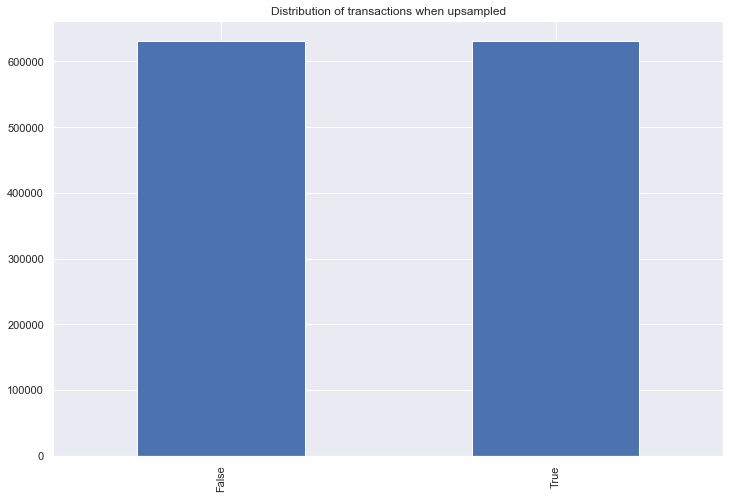

In [128]:
upCount = upsamp['isFraud'].value_counts()
print(upCount)
ax = upCount.plot(kind='bar', figsize=(12, 8), title='Distribution of transactions when upsampled')
plt.show()

In [129]:
targetup = upsamp['isFraud']
finalDfup = upsamp.drop(['isFraud'], axis=1)

In [130]:
trainup_features, testup_features, trainup_labels, testup_labels = train_test_split(finalDfup, targetup, test_size=0.25, random_state=42)

print('Training Features Shape:', trainup_features.shape)
print('Training Labels Shape:', trainup_labels.shape)
print('Testing Features Shape:', testup_features.shape)
print('Testing Labels Shape:', testup_labels.shape)

Training Features Shape: (945918, 48)
Training Labels Shape: (945918,)
Testing Features Shape: (315306, 48)
Testing Labels Shape: (315306,)


#### Random Forest Classifier

In [131]:
rfup = RandomForestClassifier(n_estimators=10, random_state=42)
rfup.fit(trainup_features, trainup_labels)

RandomForestClassifier(n_estimators=10, random_state=42)

In [132]:
predsup = rfup.predict(testup_features)
preds_trainup = rfup.predict(trainup_features)

In [134]:
print('Performance of random forest with upsampling on test set\n')
print('Precision score: ', precision_score(testup_labels, predsup, average='macro'))
print('Recall score: ', recall_score(testup_labels, predsup, average='macro'))
print('Accuracy Score: ', accuracy_score(testup_labels, predsup))
print('F-1 Score: ', f1_score(testup_labels, predsup, average='macro'))

Performance of random forest with upsampling on test set

Precision score:  0.9998222651042923
Recall score:  0.9998225871857258
Accuracy Score:  0.9998223947530336
F-1 Score:  0.9998223946069089


In [135]:
print("Random Forest Confusion Matrix on Test Set:\n", pd.crosstab(testup_labels, predsup, rownames=['Actual'], colnames=['Predicted']))

Random Forest Confusion Matrix on Test Set:
 Predicted   False    True
Actual                   
False      157768      56
True            0  157482


In [136]:
print('Performance of random forest with upsampling on train set\n')
print('Precision score: ', precision_score(trainup_labels, preds_trainup, average='macro'))
print('Recall score: ', recall_score(trainup_labels, preds_trainup, average='macro'))
print('Accuracy Score: ', accuracy_score(trainup_labels, preds_trainup))
print('F-1 Score: ', f1_score(trainup_labels, preds_trainup, average='macro'))


Performance of random forest with upsampling on train set

Precision score:  0.9999989432102314
Recall score:  0.9999989424435476
Accuracy Score:  0.999998942825911
F-1 Score:  0.999998942825772


In [137]:
print("Random Forest Confusion Matrix on Train Set:\n", pd.crosstab(trainup_labels, preds_trainup, rownames=['Actual'], colnames=['Predicted']))

Random Forest Confusion Matrix on Train Set:
 Predicted   False    True
Actual                   
False      472787       1
True            0  473130


Training Accuracy: Almost perfect, indicating excellent fit on training data.</br>
Testing Accuracy: Extremely high, showing excellent generalization.</br>
Precision and Recall Scores: Near-perfect precision and recall, ensuring accurate identification of fraudulent transactions.</br>
Confusion Matrix: Shows very few misclassifications, demonstrating the model's effectiveness.</br>

#### Logistic Regression

In [138]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(trainup_features, trainup_labels)

LogisticRegression(max_iter=1000, random_state=42)

In [139]:
log_preds = log_reg.predict(testup_features)
log_preds_train = log_reg.predict(trainup_features)

In [140]:
print('Performance of logistic regression with upsampling on test set\n')
print('Precision score: ', precision_score(testup_labels, log_preds, average='macro'))
print('Recall score: ', recall_score(testup_labels, log_preds, average='macro'))
print('Accuracy Score: ', accuracy_score(testup_labels, log_preds))
print('F-1 Score: ', f1_score(testup_labels, log_preds, average='macro'))

Performance of logistic regression with upsampling on test set

Precision score:  0.6683208815406756
Recall score:  0.6682373590784376
Accuracy Score:  0.6682492562780283
F-1 Score:  0.6682038879162133


In [141]:
print("Logistic Regression Confusion Matrix on Test Set:\n", pd.crosstab(testup_labels, log_preds, rownames=['Actual'], colnames=['Predicted']))

Logistic Regression Confusion Matrix on Test Set:
 Predicted   False    True
Actual                   
False      107195   50629
True        53974  103508


In [142]:
print('Performance of logistic regression with upsampling on train set\n')
print('Precision score: ', precision_score(trainup_labels, log_preds_train, average='macro'))
print('Recall score: ', recall_score(trainup_labels, log_preds_train, average='macro'))
print('Accuracy Score: ', accuracy_score(trainup_labels, log_preds_train))
print('F-1 Score: ', f1_score(trainup_labels, log_preds_train, average='macro'))

Performance of logistic regression with upsampling on train set

Precision score:  0.6690675697494859
Recall score:  0.669007508588851
Accuracy Score:  0.6690040785776357
F-1 Score:  0.6689757860068546


In [143]:
print("Logistic Regression Confusion Matrix on Train Set:\n", pd.crosstab(trainup_labels, log_preds_train, rownames=['Actual'], colnames=['Predicted']))

Logistic Regression Confusion Matrix on Train Set:
 Predicted   False    True
Actual                   
False      320784  152004
True       161091  312039


Training and Testing Accuracy: Moderate, showing consistent performance.</br>
Precision and Recall: Both moderate, indicating reasonable identification of fraudulent transactions but with more misclassifications.</br>
Confusion Matrix: Higher misclassifications compared to Random Forest, reflecting lower performance.</br>

### Random Forest outperforms Logistic Regression significantly, demonstrating near-perfect performance metrics due to the effectiveness of SMOTE in balancing the dataset.